https://www.kaggle.com/code/user189982/data-science-for-financial-markets/edit

<h1 style="font-family: 'Cambria', Georgia, serif; font-weight: bold; border-bottom: 3px solid #000; padding: 8px; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Data Science for Financial Markets</h1>

In [ ]:
# to .py file
# !jupyter nbconvert --to script data_science_for_financial_markets.ipynb

[NbConvertApp] Converting notebook data_science_for_financial_markets.ipynb to script
[NbConvertApp] Writing 104892 bytes to data_science_for_financial_markets.py


In [5]:
!pip install PyPortfolioOpt quantstats ta

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.9 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=cffa992fa722a816a6a580274cbcde89317ab948b0bd37433f960ac3283c8929
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


<h3 style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Table of Contents</h3>

In [6]:
# Importing Libraries

# Data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import yfinance as yf
# 「pandas_datareader」の処理を更新する
# yf.pdr_override()
import numpy as np
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode # Enabling Plotly offline
init_notebook_mode(connected = True)

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
qs.extend_pandas() # extend pandas functionality with metrics, etc.
import ta

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Datetime and hiding warnings
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [7]:
 #全体のフォントを設定
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level = logging.CRITICAL)

plt.rcParams["figure.figsize"] = [11, 7] # グラフのサイズを指定
plt.rcParams['font.size'] = 20 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 15 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 15 # 縦軸のフォントサイズ


In [ ]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both

<h1 id="getting-started" style="font-family: 'Cambria', Georgia, serif; font-weight: bold; border-bottom: 3px solid #000; padding: 8px; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">1 | Getting Started</h1>
<br>
<h2 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Daily Returns</h2>

In [ ]:
help(qs.plots)

Help on module quantstats.plots in quantstats:

NAME
    quantstats.plots

DESCRIPTION
    # -*- coding: UTF-8 -*-
    #
    # QuantStats: Portfolio analytics for quants
    # https://github.com/ranaroussi/quantstats
    #
    # Copyright 2019-2023 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.

FILE
    /home/bayes/.local/lib/python3.10/site-packages/quantstats/plots.py




In [ ]:
help(dir(qs))

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

In [ ]:
help(qs.utils)

Help on module quantstats.utils in quantstats:

NAME
    quantstats.utils

DESCRIPTION
    # -*- coding: UTF-8 -*-
    #
    # QuantStats: Portfolio analytics for quants
    # https://github.com/ranaroussi/quantstats
    #
    # Copyright 2019-2023 Ran Aroussi
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    # ˜
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.

FUNCTIONS
    aggregate_returns(returns, period=None, compounded=True)
        Aggregates returns based on date periods
    
    download_returns(ti

In [9]:
# Getting daily returns for 4 different US stocks in the same time window
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2018-07-01':'2024-10-29']

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2018-07-01':'2024-10-29']

intl = qs.utils.download_returns('INTC')
intl = intl.loc['2018-07-01':'2024-10-29']

amd = qs.utils.download_returns('AMD')
amd = amd.loc['2018-07-01':'2024-10-29']
amd.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1593 entries, 2018-07-02 to 2024-10-29
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1593 non-null   float64
dtypes: float64(1)
memory usage: 24.9 KB


In [10]:
intl.head(1)

,Close
Date,
2018-07-02,0.009857


In [ ]:
help(amd.index.tz_localize)

Help on method tz_localize in module pandas.core.indexes.datetimes:

tz_localize(tz, ambiguous: 'TimeAmbiguous' = 'raise', nonexistent: 'TimeNonexistent' = 'raise') -> 'DatetimeIndex' method of pandas.core.indexes.datetimes.DatetimeIndex instance
    Localize tz-naive Datetime Array/Index to tz-aware Datetime Array/Index.
    
    This method takes a time zone (tz) naive Datetime Array/Index object
    and makes this time zone aware. It does not move the time to another
    time zone.
    
    This method can also be used to do the inverse -- to create a time
    zone unaware object from an aware object. To that end, pass `tz=None`.
    
    Parameters
    ----------
    tz : str, pytz.timezone, dateutil.tz.tzfile, datetime.tzinfo or None
        Time zone to convert timestamps to. Passing ``None`` will
        remove the time zone information preserving local time.
    ambiguous : 'infer', 'NaT', bool array, default 'raise'
        When clocks moved backward due to DST, ambiguous time

In [11]:
# Converting timezone
aapl.index = aapl.index.tz_localize(None) # pd.to_datetime(df['t'], utc = True, unit = 'ms').dt.tz_convert('America/New_York')
tsla.index = tsla.index.tz_localize(None)
intl.index = intl.index.tz_localize(None)
amd.index = amd.index.tz_localize(None)

In [13]:
help(qs.plots)

Help on module quantstats.plots in quantstats:

NAME
    quantstats.plots

DESCRIPTION
    # -*- coding: UTF-8 -*-
    #
    # QuantStats: Portfolio analytics for quants
    # https://github.com/ranaroussi/quantstats
    #
    # Copyright 2019-2024 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.

FILE
    /usr/local/lib/python3.10/dist-packages/quantstats/plots.py




In [14]:
# Plotting Daily Returns for each stock
#
print('\nApple Daily Returns Plot:\n')

qs.plots.daily_returns(aapl, benchmark =  False)

print('\nTesla Inc. Daily Returns Plot:\n')

qs.plots.daily_returns(tsla, benchmark =  False)

print('\nIntl intlney Company Daily Returns Plot:\n')

qs.plots.daily_returns(intl, benchmark =  False)

print('\nAdvances Micro Devices, Inc. Daily Returns Plot:\n')

qs.plots.daily_returns(amd, benchmark =  False)


Apple Daily Returns Plot:


Tesla Inc. Daily Returns Plot:



UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

<h2 id = 'cumulative-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Cumulative Returns</h2>


Apple Cumulative Returns Plot



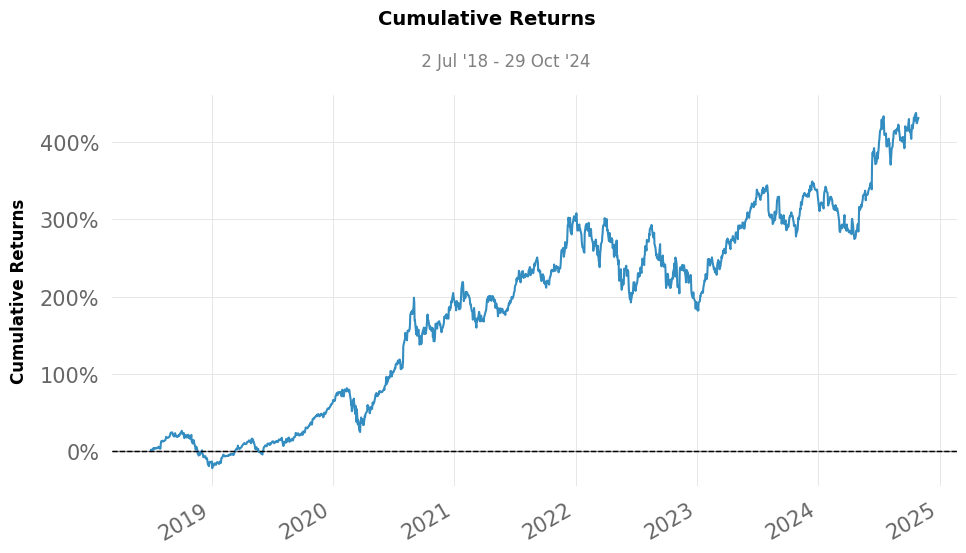


Tesla Inc. Cumulative Returns Plot



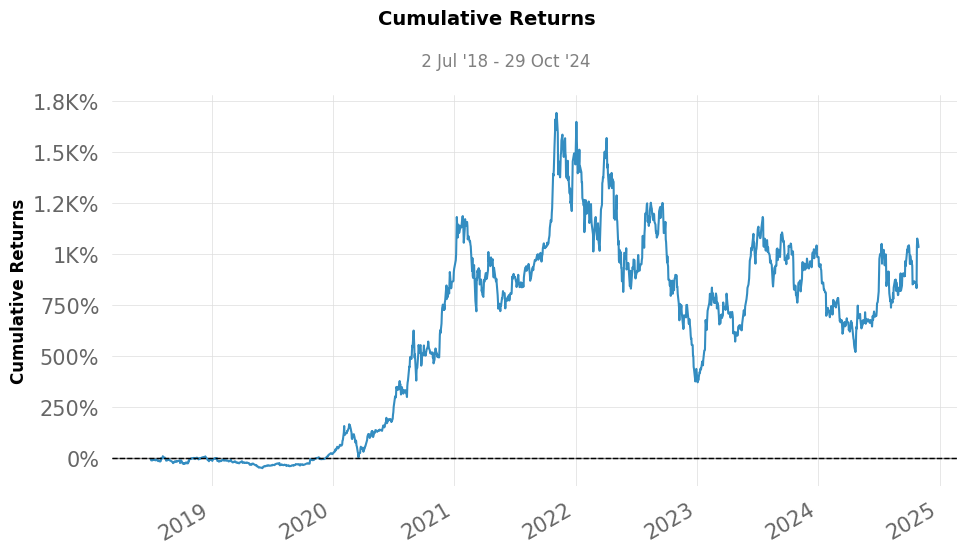


The Walt intlney Company Cumulative Returns Plot



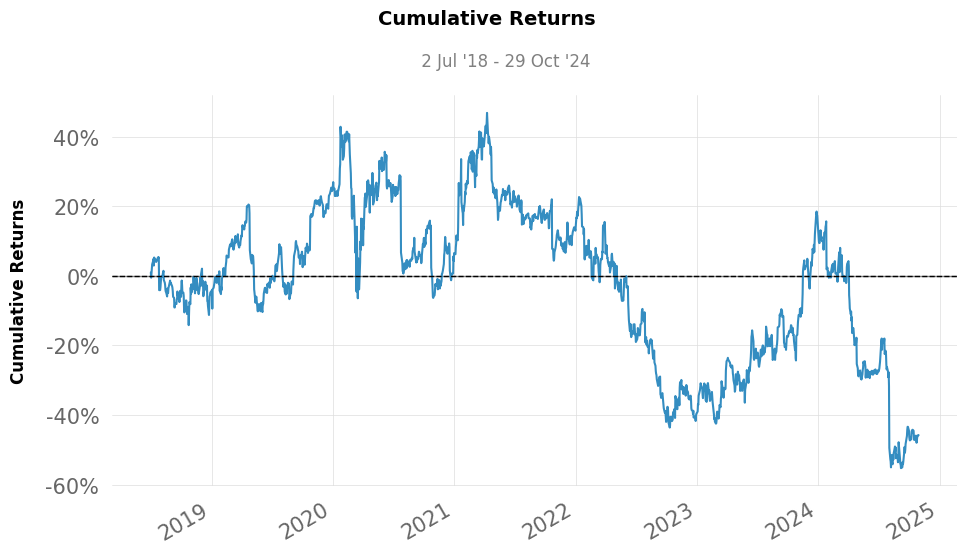


Advances Micro Devices, Inc. Cumulative Returns Plot



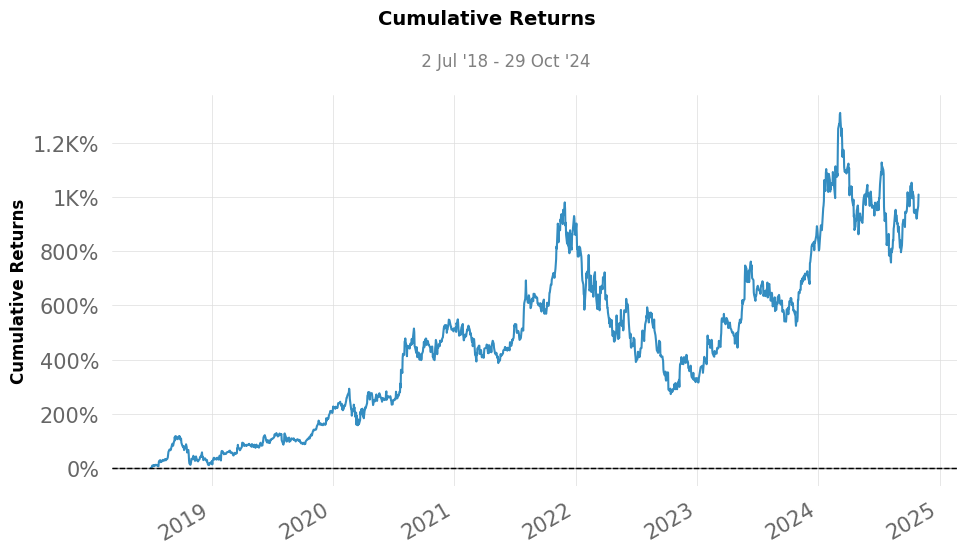

In [15]:
# Plotting Cumulative Returns for each stock
print('\nApple Cumulative Returns Plot\n')

qs.plots.returns(aapl)

print('\nTesla Inc. Cumulative Returns Plot\n')

qs.plots.returns(tsla)

print('\nThe Walt intlney Company Cumulative Returns Plot\n')

qs.plots.returns(intl)

print('\nAdvances Micro Devices, Inc. Cumulative Returns Plot\n')

qs.plots.returns(amd)

<h2 id= 'histograms' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Histograms</h2>


Apple Daily Returns Histogram


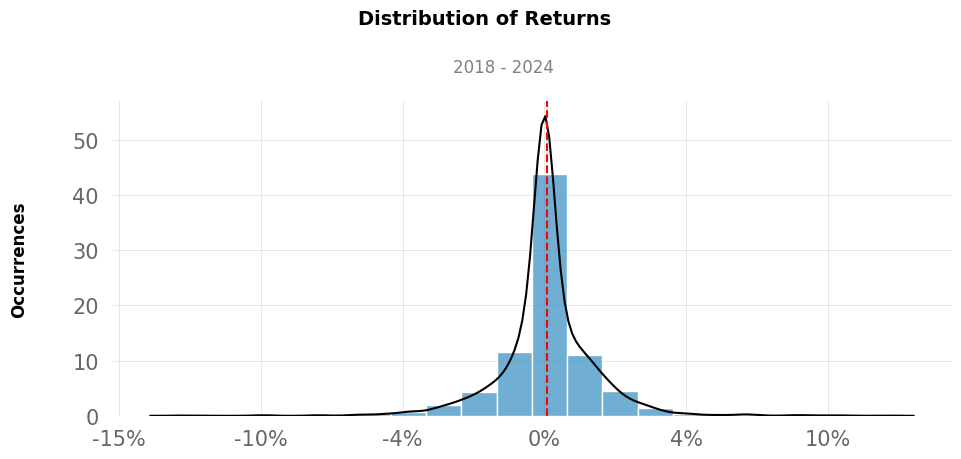


Tesla Inc. Daily Returns Histogram


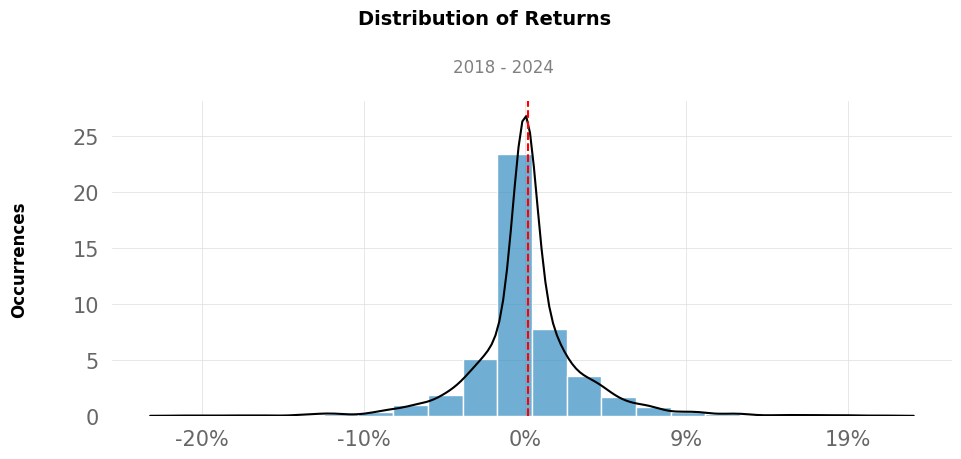


The Walt intlney Company Daily Returns Histogram


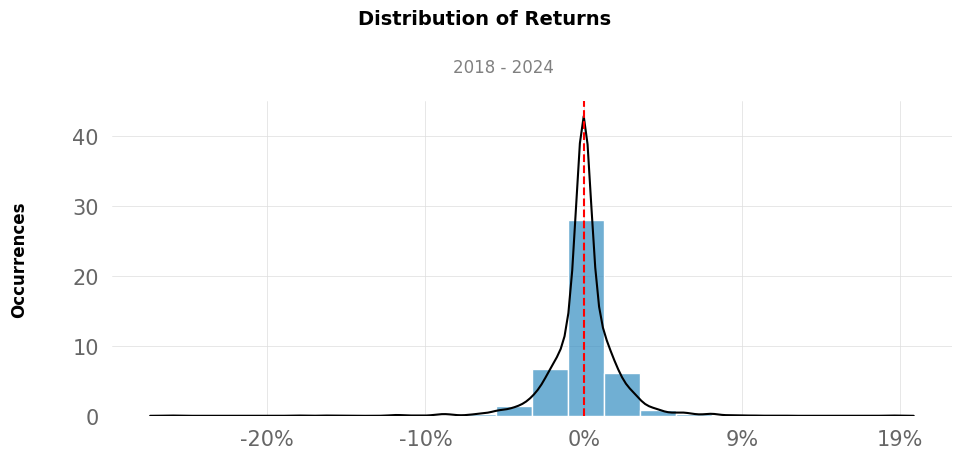


Advances Micro Devices, Inc. Daily Returns Histogram


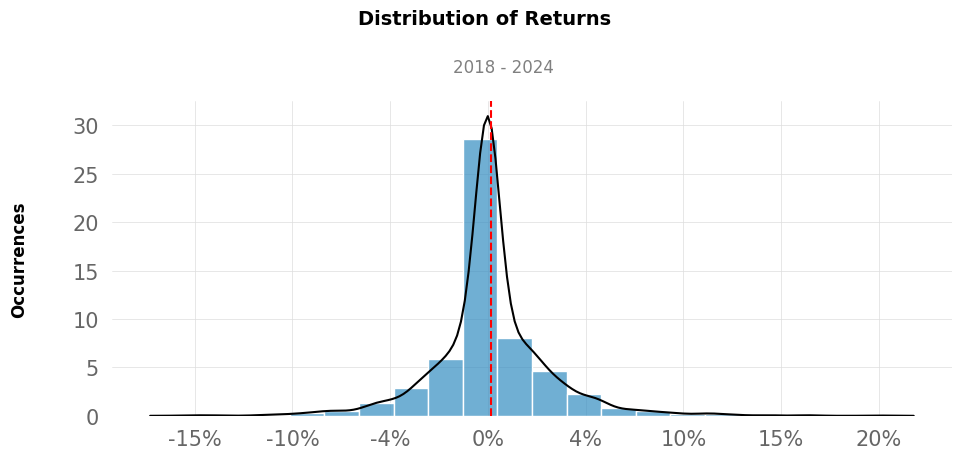

In [16]:
# Plotting histograms for daily returns
print('\nApple Daily Returns Histogram')
qs.plots.histogram(aapl, resample = 'D')

print('\nTesla Inc. Daily Returns Histogram')
qs.plots.histogram(tsla, resample = 'D')

print('\nThe Walt intlney Company Daily Returns Histogram')
qs.plots.histogram(intl, resample = 'D')

print('\nAdvances Micro Devices, Inc. Daily Returns Histogram')

qs.plots.histogram(amd, resample = 'D')

<h2 id = 'kurtosis' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Kurtosis</h2>

In [17]:
# Using quantstats to measure kurtosis

print("Apple's kurtosis: ", qs.stats.kurtosis(aapl).round(2))

print("Tesla's kurtosis: ", qs.stats.kurtosis(tsla).round(2))

print("Walt intlney's kurtosis: ", qs.stats.kurtosis(intl).round(3))

print("Advances Micro Devices' kurtosis: ", qs.stats.kurtosis(amd).round(3))

Apple's kurtosis:  5.04
Tesla's kurtosis:  3.64
Walt intlney's kurtosis:  13.625
Advances Micro Devices' kurtosis:  2.819


<h2 id = 'skewness' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Skewness</h2>

In [18]:
# Measuring skewness with quantstats

print("Apple's skewness: ", qs.stats.skew(aapl).round(2))

print("Tesla's skewness: ", qs.stats.skew(tsla).round(2))

print("Walt intlney's skewness: ", qs.stats.skew(intl).round(3))

print("Advances Micro Devices' skewness: ", qs.stats.skew(amd).round(3))

Apple's skewness:  -0.02
Tesla's skewness:  0.27
Walt intlney's skewness:  -0.897
Advances Micro Devices' skewness:  0.286


<h2 id ='standard-deviation' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Standard Deviation</h2>

In [20]:
# Calculating Standard Deviations

print("Apple's Standard Deviation from 2010 to 2023: ", aapl.std())

print("\nTesla's Standard Deviation from 2010 to 2023: ", tsla.std())

print("\nIntl's Standard Deviation from 2010 to 2023: ", intl.std())

print("\nAMD's Standard Deviation from 2010 to 2023: ", amd.std())

Apple's Standard Deviation from 2010 to 2023:  0.019706583868819537

Tesla's Standard Deviation from 2010 to 2023:  0.040670987252563975

intl's Standard Deviation from 2010 to 2023:  0.02537201124569363

AMD's Standard Deviation from 2010 to 2023:  0.034699088754051984


<h2 id = 'pairplots-correlation' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Pairplots and Correlation Matrix</h2>

In [21]:
# Merging daily returns into one dataframe
merged_df = pd.concat([aapl, tsla, intl, amd], join = 'outer', axis = 1)
merged_df.columns = ['aapl', 'tsla', 'intl', 'amd']
merged_df # intlplaying dataframe

,aapl,tsla,intl,amd
Date,,,,
2018-07-02,0.011183,-0.022977,0.009857,0.011341
2018-07-03,-0.017416,-0.072253,-0.014542,-0.010554
2018-07-05,0.008047,-0.005469,0.025874,0.033333
2018-07-06,0.013862,-0.000841,0.012217,0.055484
2018-07-09,0.013885,0.031110,0.009539,0.015281
...,...,...,...,...
2024-10-23,-0.021623,-0.019819,-0.018750,-0.007658
2024-10-24,-0.000823,0.219190,0.016379,0.003466
2024-10-25,0.003643,0.033438,0.015219,0.018183


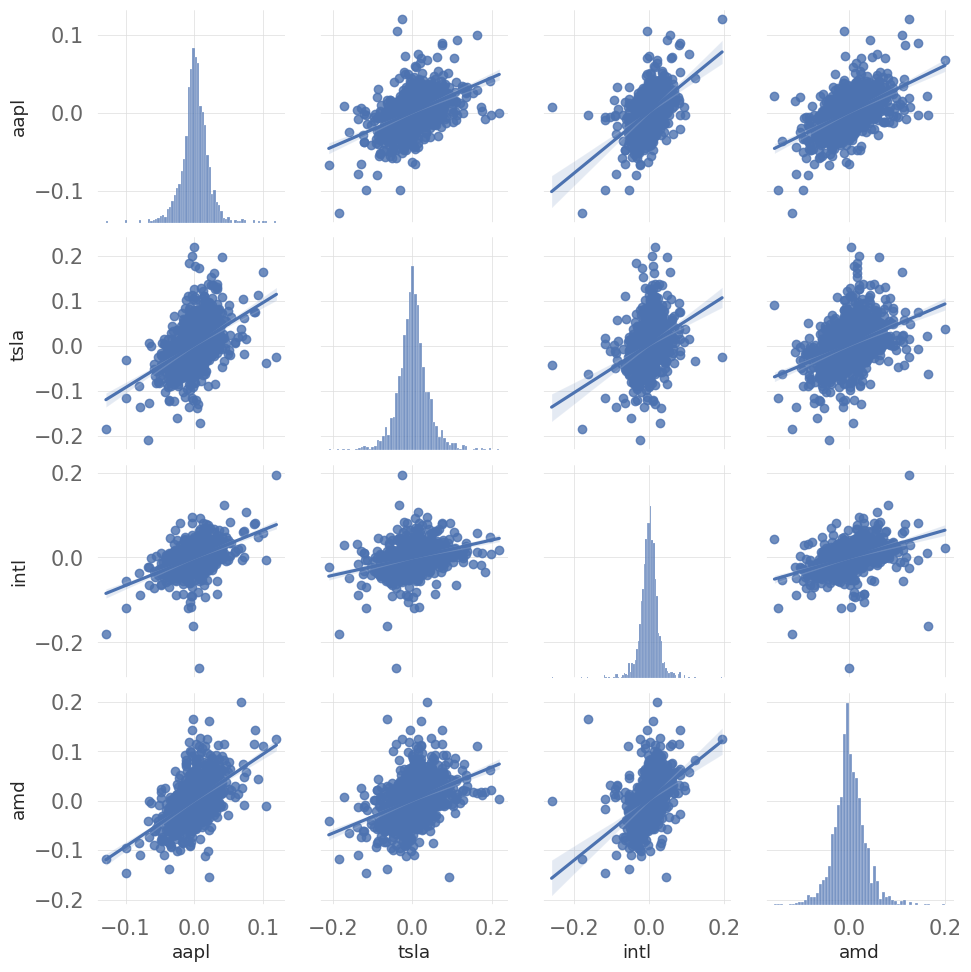

In [22]:
# Pairplots
sns.pairplot(merged_df, kind = 'reg')
plt.show()

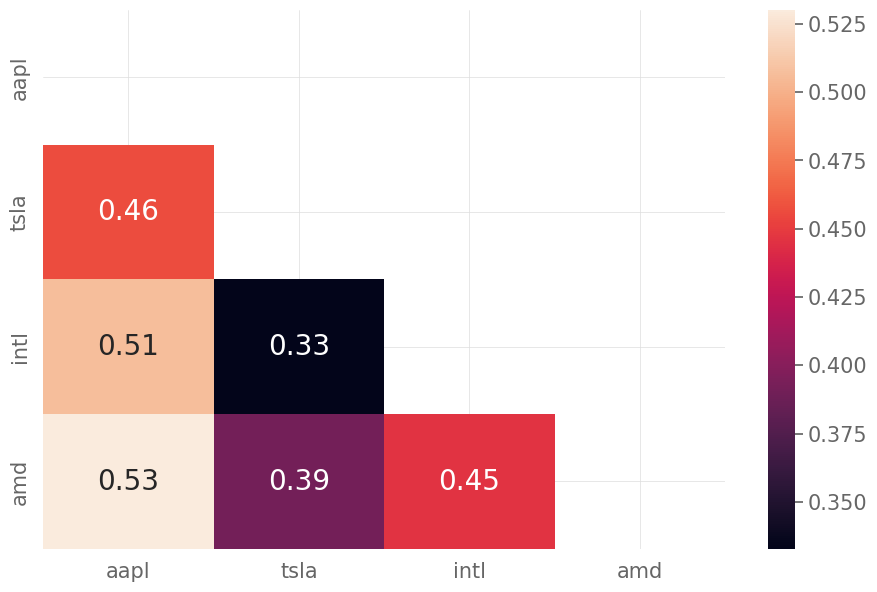

In [25]:
# Correlation Matrix
corr = merged_df.corr()
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, mask = mask)
plt.show()

<h2 id='beta-alpha' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Beta and Alpha</h2>

In [27]:
# Loading data from the SP500, the american benchmark
sp500 = qs.utils.download_returns('^GSPC')
sp500 = sp500.loc['2018-07-01':'2024-10-29']
sp500.index = sp500.index.tz_localize(None)
sp500

,Close
Date,
2018-07-02,0.003068
2018-07-03,-0.004947
2018-07-05,0.008621
2018-07-06,0.008481
2018-07-09,0.008823
...,...
2024-10-23,-0.009191
2024-10-24,0.002146
2024-10-25,-0.000299


In [28]:
# Removing indexes
sp500_no_index = sp500.reset_index(drop = True)
aapl_no_index = aapl.reset_index(drop = True)
tsla_no_index = tsla.reset_index(drop = True)
intl_no_index = intl.reset_index(drop = True)
amd_no_index = amd.reset_index(drop = True)

sp500_no_index.info() # Daily returns for the SP500

<class 'pandas.core.series.Series'>
RangeIndex: 1593 entries, 0 to 1592
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1593 non-null   float64
dtypes: float64(1)
memory usage: 12.6 KB


#### use the Scikit-Learn's Linear Regression model to extract Beta and Alpha from the analyzed stocks.

In [29]:
# can use the Scikit-Learn's Linear Regression model to extract Beta and Alpha from the analyzed stocks.
# Fitting linear relation among Apple's returns and Benchmark
X = sp500_no_index.values.reshape(-1, 1)
y = aapl_no_index.values.reshape(-1, 1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('AAPL beta: ', beta.round(3))
print('\nAAPL alpha: ', alpha.round(3))

AAPL beta:  [1.221]

AAPL alpha:  [0.001]


In [30]:
# Fitting linear relation among Tesla's returns and Benchmark
X = sp500_no_index.values.reshape(-1, 1)
y = tsla_no_index.values.reshape(-1, 1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('TSLA beta: ', beta.round(3))
print('\nTSLA alpha: ', alpha.round(3))

TSLA beta:  [1.525]

TSLA alpha:  [0.001]


In [32]:
# Fitting linear relation among Walt intlney's returns and Benchmark
X = sp500_no_index.values.reshape(-1, 1)
y = intl_no_index.values.reshape(-1, 1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('Intl Company beta: ', beta.round(3))
print('\nIntl Company alpha: ', alpha.round(4))

Intl Company beta:  [1.261]

Intl Company alpha:  [-0.0008]


In [33]:
# Fitting linear relation among AMD's returns and Benchmark
X = sp500_no_index.values.reshape(-1, 1)
y = amd_no_index.values.reshape(-1, 1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('AMD beta: ', beta.round(3))
print('\nAMD alpha: ', alpha.round(4))

AMD beta:  [1.648]

AMD alpha:  [0.0012]


<h2 id= 'sharpe-ratio' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Sharpe Ratio</h2>

In [34]:
# Calculating Sharpe ratio

print("Sharpe Ratio for AAPL: ", qs.stats.sharpe(aapl).round(2))

print("Sharpe Ratio for TSLA: ", qs.stats.sharpe(tsla).round(2))

print("Sharpe Ratio for intl: ", qs.stats.sharpe(intl).round(2))

print("Sharpe Ratio for AMD: ", qs.stats.sharpe(amd).round(2))


Sharpe Ratio for AAPL:  1.0
Sharpe Ratio for TSLA:  0.92
Sharpe Ratio for intl:  -0.04
Sharpe Ratio for AMD:  0.97


### Initial Conclusions
Some initial conclusions can be drawn via the analysis of the metrics above:  

Apple and Tesla have the best Sharpe ratios, which indicates a better risk-return relationship  

Tesla has the highest returns of them all, but it's also more volatile than Apple and intlney  

Apple has higher returns and low volatility compared to the other assets. It has the best Sharpe ratio, low beta, low standard  

deviation, and low asymmetry of returns  

AMD is the riskier and more volatile investment option of the four. Its returns intltribution is highly asymmetric, it has a high standard deviation value and high beta  

intlney stocks may be a good option for investors that are sensitive to risk, considering they had a steady and stable return over the period  

It's possible to say that, from all the assets analyzed, Apple offers the best risk-return relationship, with high rentability and lower risk than the other options.


<h1 id = "building-portfolio" style="font-family: 'Cambria', Georgia, serif; font-weight: bold; border-bottom: 3px solid #000; padding: 8px; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">2 | Building and Optimizing Portfolios </h1>

To start exploring portfolio construction and optimization, we ought to build a portfolio consisting of the four stocks that have been analyzed so far, with an initial weighting of 25% each.

In [35]:
# Equally wighted
weights = [0.25, 0.25, 0.25, 0.25] # Defining weights for each stock
portfolio = aapl * weights[0] + tsla * weights[1] + intl * weights[2] + amd * weights[3] # Creating portfolio multiplying each stock for its respective weight
portfolio # intlplaying portfolio's daily returns

,Close
Date,
2018-07-02,0.002351
2018-07-03,-0.028691
2018-07-05,0.015446
2018-07-06,0.020180
2018-07-09,0.017454
...,...
2024-10-23,-0.016963
2024-10-24,0.059553
2024-10-25,0.017621


With Quantstats you can easily create a report to compare the portfolio's performance and its level of risk with a benchmark, which in this case is the SP500. The platform provides various metrics and useful visualizations to analyze the portfolio's performance and risk.

[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2018-07-02   2018-07-02
End Period                 2024-10-29   2024-10-29
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          114.57%      521.25%
CAGR﹪                     8.68%        22.04%

Sharpe                     0.7          0.98
Prob. Sharpe Ratio         95.91%       99.25%
Smart Sharpe               0.64         0.89
Sortino                    0.98         1.41
Smart Sortino              0.89         1.28
Sortino/√2                 0.69         1.0
Smart Sortino/√2           0.63         0.91
Omega                      1.18         1.18

Max Drawdown               -33.92%      -53.19%
Longest DD Days            745          914
Volatility (ann.)          20.09%       36.43%
R^2                        0.61         0.61
Information Ratio          0.06         0

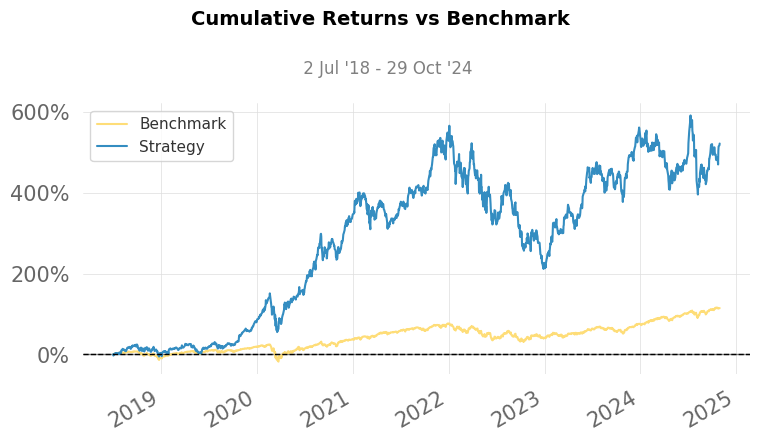

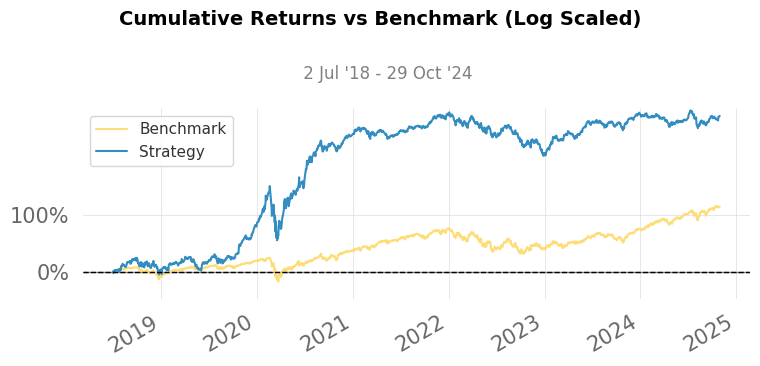

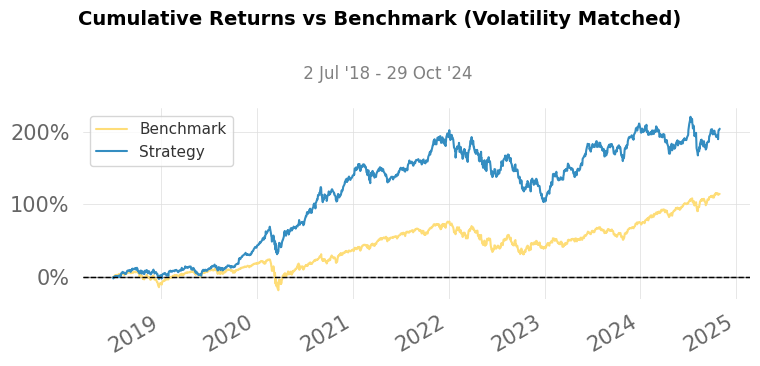

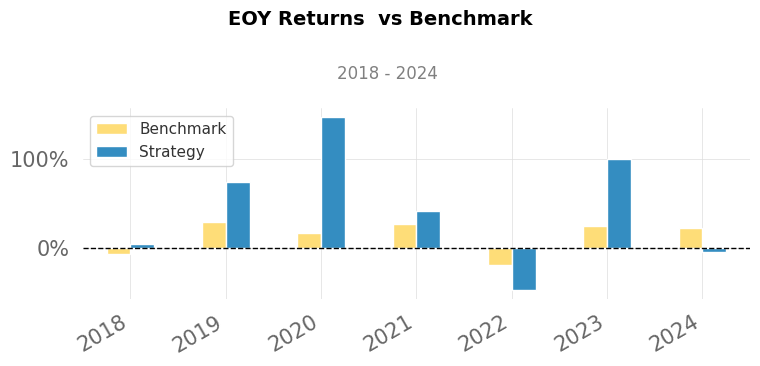

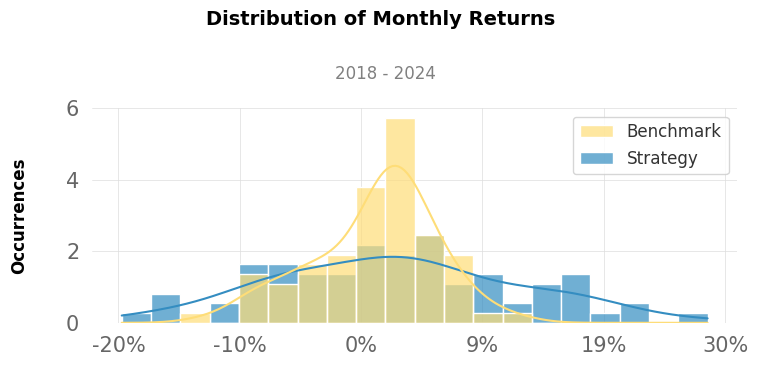

UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [36]:
# Generating report on portfolio performance from July 1st, 2010 to  2024
qs.reports.full(portfolio, benchmark = sp500)

<h2 id='optimizing-portfolio' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Optimizing Portfolio</h2>

">Portfolio optimization is the process of selecting the optimal combination of assets and weights to maximize returns and minimize risk. This process involves selecting the most appropriate weights for each asset,by taking into account the historical performance of the assets, their correlations with each other, and other relevant factors such as market conditions and economic outlook. The main goal is to create a well-diversified portfolio that balances risk and returns, and that aligns with the investor's risk tolerance.  
<br>
In Python, PyPortfolioOpt is a very useful library for portfolio optimization, providing an efficient and easy-to-use toolset for constructing optimal portfolios, with a wide range of optimization algorithms and methods available. These include modern portfolio theory, minimum variance portfolio, maximum diversification portfolio, Black-Litterman optimization, and many more.

To start the optimization process, we must have a pandas dataframe containing the adjusted closing prices of the stocks, with dates as index, and each columns representing each stock. This dataframe will serve as input to optimize the weighting of the stocks in the portfolio

In [37]:
# Getting dataframes info for Stocks using yfinance
aapl_df = yf.download('AAPL', start = '2018-07-01', end = '2024-10-29')
tsla_df = yf.download('TSLA', start = '2018-07-01', end = '2024-10-29')
intl_df = yf.download('intl', start = '2018-07-01', end = '2024-10-29')
df = yf.download('AMD', start = '2018-07-01', end = '2024-10-29')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [38]:
# Extracting Adjusted Close for each stock
aapl_df = aapl_df['Adj Close']
tsla_df = tsla_df['Adj Close']
intl_df = intl_df['Adj Close']
df = df['Adj Close']

In [39]:
# Merging and creating an Adj Close dataframe for stocks
df = pd.concat([aapl_df, tsla_df, intl_df, df], join = 'outer', axis = 1)
df.columns = ['aapl', 'tsla', 'intl', 'amd']
df.head()

,aapl,tsla,intl,amd
Date,,,,
2018-07-02 00:00:00+00:00,44.384312,22.337999,NaN,15.160000
2018-07-03 00:00:00+00:00,43.611309,20.724001,NaN,15.000000
2018-07-05 00:00:00+00:00,43.962242,20.610666,NaN,15.500000
2018-07-06 00:00:00+00:00,44.571636,20.593332,NaN,16.360001
2018-07-09 00:00:00+00:00,45.190536,21.233999,NaN,16.610001


<h2 id = 'markowitz' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Markowitz Mean-Variance Optimization Model</h2>

The Markowitz Mean-Variance Optimization Model is a widely-used framework for constructing portfolios with the best risk-return relationship. It is based on the idea that investors should maximize the expected return of a portfolio while minimizing its risk.  
<br>
PyPortfolioOpt simplifies the implementation of the Markowitz Mean-Variance Optimization Model, allowing investors to easily determine how to allocate weights across a portfolio for maximal Sharpe ratio, besides many other different objectives according to each investor's risk tolerance and goals.
<br>
There are two key requirements for mean-variance optimization:
<br>
First, we need to have expected returns for each of the assets in the portfolio. PyPortfolioOpt provides the <i>expected_returns</i> module, which calculates expected returns for the assets by computing the arithmetic mean of their daily percentage changes. The module assumes that daily prices are available as input and produces expected annual returns as output. More information on this topic is available <a href = "https://pyportfolioopt.readthedocs.io/en/latest/ExpectedReturns.html">here</a>.
<br>
Secondly, we need to choose a risk model that quantifies the level of risk in each asset. The most commonly used risk model is the covariance matrix, which describes the volatilities of assets and the degree to which they are co-dependent. Choosing an appropriate risk model is critical, because it can help to reduce risk by making many uncorrelated bets. PyPortfolioOpt offers a range of risk models to choose from, including the annualized sample covariance matrix of daily returns, semicovariance matrix, and exponentially-weighted covariance matrix. Further information on risk models can be found <a href = "https://pyportfolioopt.readthedocs.io/en/latest/RiskModels.html#risk-models">here</a>

In [40]:
# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [41]:
# Calculating the annualized expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(df) #expected returns
S = risk_models.sample_cov(df) #Covariance matrix

In [42]:
# the annualized expected returns
print('the annualized expected returns\n' , mu)

the annualized expected returns
 aapl    0.300481
tsla    0.477387
intl    0.102533
amd     0.452333
dtype: float64


In [43]:
# the covariance matrix
print('the covariance matrix\n', S)

the covariance matrix
           aapl      tsla      intl       amd
aapl  0.097971  0.092422  0.013494  0.091448
tsla  0.092422  0.417233  0.029077  0.139222
intl  0.013494  0.029077  0.020154  0.028754
amd   0.091448  0.139222  0.028754  0.303560


Now that we have estimated the expected returns and the covariance matrix, we can use these inputs for portfolio optimization.
<br>
The PyPortfolioOpt library provides the EfficientFrontier class, which takes the covariance matrix and expected returns as inputs. The weights variable stores the optimized weights for each asset based on the specified objective, which in this case is the maximization of the Sharpe ratio, achieved by using the <i>max_sharpe</i> method.<
<br>
PyPortfolioOpt offers various other optimization objectives, such as weights optimized for minimum volatility, maximum returns for a given target risk, maximum quadratic utility, and many others. To read more on optimization objectives, <a href = "https://pyportfolioopt.readthedocs.io/en/latest/MeanVariance.html">click here</a>.

In [44]:
# Optimizing for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
print('optimized weights and expected performance for portfolio\n', clean_weights)

optimized weights and expected performance for portfolio
 OrderedDict([('aapl', 0.40791), ('tsla', 0.09849), ('intl', 0.35981), ('amd', 0.13379)])


After running the optimizer, it resulted in an optimized weighting for a portfolio where 70.83% of its allocation is invested in Apple stocks, and the remaining 29.17% invested in Tesla stocks. No allocation was made to intlney or AMD.  
\With the optimized weights in hand, we can construct a new portfolio and use Quantstats to compare its performance to that of the previously constructed portfolio.

In [45]:
# Creating new portfolio with optimized weights
new_weights = [0.70828, 0.29172]
optimized_portfolio = aapl * new_weights[0] + tsla * new_weights[1]
print('optimized portfolio daily returns\n', optimized_portfolio) # Visualizing daily returns

optimized portfolio daily returns
 Date
2018-07-02    0.001217
2018-07-03   -0.033413
2018-07-05    0.004104
2018-07-06    0.009573
2018-07-09    0.018910
                ...   
2024-10-23   -0.021097
2024-10-24    0.063359
2024-10-25    0.012335
2024-10-28   -0.001148
2024-10-29   -0.002503
Name: Close, Length: 1593, dtype: float64


[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2018-07-02   2018-07-02
End Period                 2024-10-29   2024-10-29
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          521.25%      720.44%
CAGR﹪                     22.04%       25.8%

Sharpe                     0.98         1.13
Prob. Sharpe Ratio         99.25%       99.75%
Smart Sharpe               0.91         1.05
Sortino                    1.41         1.65
Smart Sortino              1.32         1.54
Sortino/√2                 1.0          1.16
Smart Sortino/√2           0.93         1.09
Omega                      1.22         1.22

Max Drawdown               -53.19%      -45.96%
Longest DD Days            914          560
Volatility (ann.)          36.43%       35.03%
R^2                        0.81         0.81
Information Ratio          0.02         0

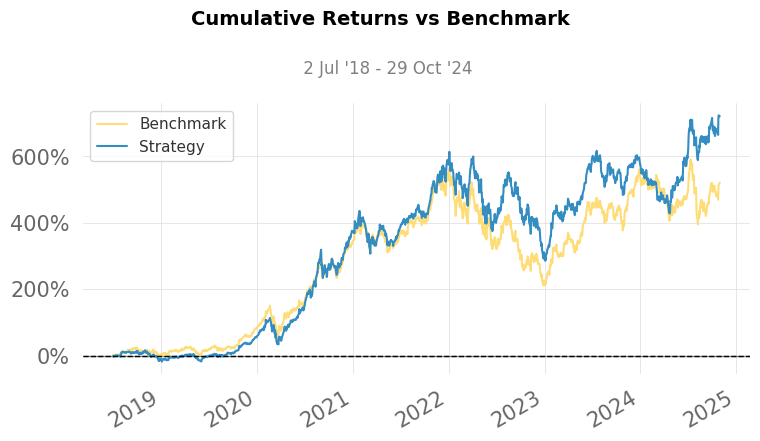

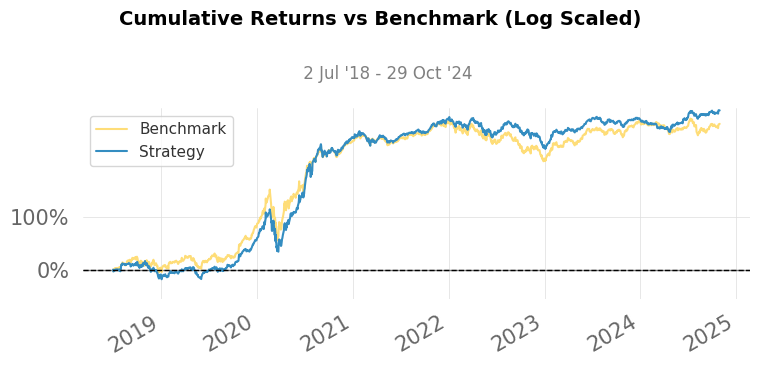

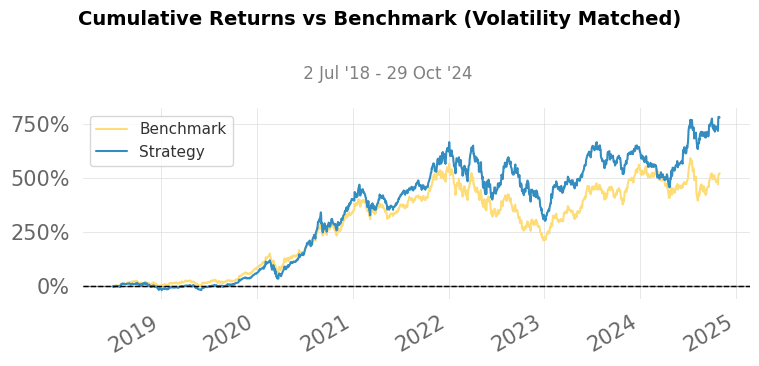

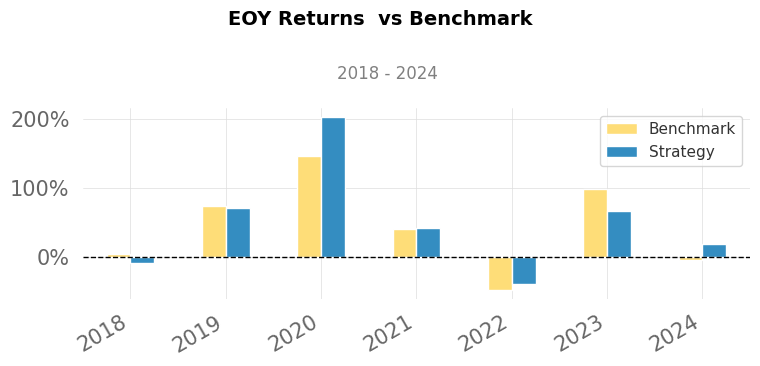

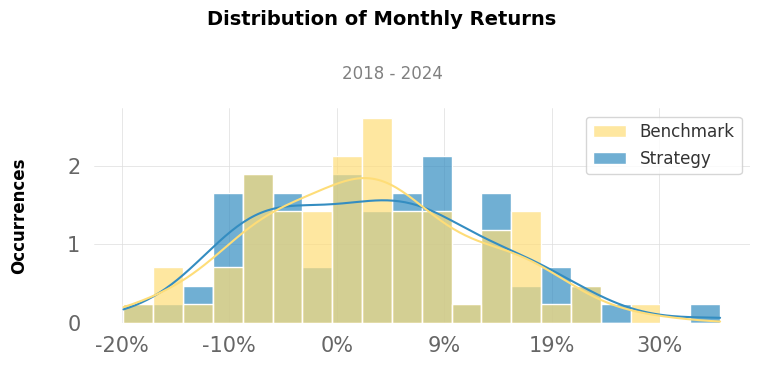

UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [46]:
# intlplaying new reports comparing the optimized portfolio to the first portfolio constructed
qs.reports.full(optimized_portfolio, benchmark = portfolio)

Based on the report above, the optimized portfolio appears to have performed better than the original portfolio. Here are some key conclusions that can be drawn by looking at the metrics and plots in the report:</p>
<br>
<b>. Cumulative Return:</b> The optimized portfolio has generated a significantly higher cumulative return of 4,830.76% compared to 3,429.90% for the original portfolio. This means that the an investment in the optimized portfolio would have provided higher earnings for investors compared to the original portfolio.</p>
<br>
<b>. CAGR:</b> The compounded annual growth rate (CAGR) of the optimized portfolio is higher at 36.18% compared to 32.62% for the original portfolio. This suggests that the optimized portfolio has generated a higher rate of return per year over the entire investment period.</p>
<br>
<b>. Sharpe Ratio:</b> The optimized portfolio has a slightly higher Sharpe ratio of 1.17 compared to 1.08 for the original portfolio, indicating that it has generated a better risk-adjusted return.</p>
<br>
<b>. Drawdown:</b> The maximum drawdown for the optimized portfolio is lower at -45.96% compared to -52.21% for the original portfolio. This means that the optimized portfolio experienced lower losses during the worst period of performance.</p>
<br>
<b>. Recovery Factor:</b> The recovery factor for the optimized portfolio is much higher at 105.12 compared to 65.7 for the original portfolio, which suggests that the optimized portfolio was able to recover from drawdowns more quickly and generate higher returns after experiencing losses.</p>
<br>
<b>. Win Rates:</b> The optimized portfolio has slightly higher win rates for win days, win months, win quarters, and win years, indicating that it had a higher probability of generating positive returns over these periods.</p>
<br>
<b>. Beta:</b> The optimized portfolio's beta of 0.86 indicates that the optimized portfolio is less volatile than the overall market, and much less volatile than the previously built portfolio.</p>
<br>
<b>. Annual Volatility:</b> The optimized portfolio has a slightly lower annual volatility than the original portfolio, with 30.52% compared to 30.59%, respectively.</p>

<h2 id = 'black-litterman' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Black-Litterman Allocation Model</h2>

In 1992, Fischer Black and Robert Litterman introduced the Black-Litterman Allocation Model, which takes a Bayesian approach to asset allocation. It combines a prior estimate of returns with the investor's particular views on his/her expected returns to generate an optimal allocation. Multiple sources of information can be used to establish the prior estimate of returns, and the model allows investors to provide a confidence level for their views, which is then used to optimize allocation.
<br>
The Black-Litterman formula calculates a weighted average between the prior estimate of returns and the views, with the weighting determined by the level of confidence for each view.</p>


<br>
A commonly used approach for determining a prior estimate of returns involves relying on the market's expectations, which are reflected in the asset's market capitalization.</p>
<br>
To do this, we first need to estimate the level of risk aversion among market participants, represented by a parameter known as <i><b>delta</b></i>, which we calculate using the closing prices of the SP500. The higher the value for <b>delta</b>, the greater the market's risk aversion.</p>
<br>
With this information, we can calculate the prior expected returns for each stock based on its market capitalization,the <i><b>delta</b></i>, and the covariance matrix <i><b>S</b></i>, which we've obtained before optimizing our portfolio with the Markowitz Mean-Variance Model. These prior expected returns gives us a starting point for the expected returns before we incoporate any of our views as investors.</p>


In the Black-Litterman model, investors can express their views as either absolute or relative. Absolute views involve statements like "APPL will return 10%", while relative views are represented by statements such as "AMZN will outperform AMD by 10%".</p>
<br>
These views must be specified in the vector <i><b>Q</b></i> and mapped into each asset via the picking matrix <i><b>P</b></i>.</p>
<br>
For instance, let's consider a portfolio with 10 assets:</p>
<br>
1. TSLA </p>
<br>
2. AAPL </p>
<br>
3. NVDA </p>
<br>
4. MSFT </p>
<br>
5. META </p>
<br>
6. AMZN </p>
<br>
7. AMD </p>
<br>
8. HD </p>
<br>
9. GOOGL </p>
<br>
10. BRKa </p>
<br>
And then consider two absolute views and two relative views, such as:</p>
<br>
1. TSLA will raise by 20%</p>
<br>
2. APPL will drop by 15%</p>
<br>
3. HD will outperform META by 10%</p>
<br>
4. GOOGL and BRKa will outperform MSTF and AMZN by 5%</p>
<br>
The views vector would be formed by taking the numbers above and specifying them as below:</p>
<br>
<br>
<code><i>Q = np.array([0.20, -0.15, 0.10, 0.05]).reshape(-1,1)</i></code>
<br>
<br>
<br>
<br>
The picking matrix would then be used to link the views of the 8 mentioned assets above to the universe of 10 assets, allowing us to propagate our expectations into the model:</p>
<br>
<br>
<br>
<code><i>P = np.array([
             [1,0,0,0,0,0,0,0,0,0],
             [0,1,0,0,0,0,0,0,0,0],
             [0,0,0,0,-1,0,0,1,0,0],
             [0,0,0,-0.5,0,-0.5,0,0,0.5,0.5],
             ])</i></code>
<br>             
<br>
<br>
<br>
Absolute views have a single 1 in the column corresponding to the asset's order in the asset universe, while relative views have a positive number in the outperforming asset column, and a negative number in the underperforming asset column. Each row for relative views in <b><i>P</i></b> must sum up to 0, and the order of views in <b><i>Q</i></b> must correspond to the order of rows in <b><i>P</i></b>.</p>

### Confidences
<br>
The confidence matrix is used to help to define the allocations in each stock. It can be implemented using the Idzorek's method, allowing investors to specify their confidence level in each of their views as a percentage. The values in the confidence matrix range from 0 to 1, where 0 indicates a low level of confidence in the view, and 1 indicates a high level of confidence.</p>

By using the confidence matrix, investors can better understand the potential impact of their views on their allocations. For example, if an investor has a high level of confidence in their view on a particular asset, they may choose to allocate a larger portion of their portfolio to that asset. On the other hand, if an investor has a low level of confidence in their view, they may choose to allocate a smaller portion of their portfolio or avoid the asset altogether.</p>

For more information on the Black-Litterman Allocation Model, I highly suggest you read this <a href = "https://pyportfolioopt.readthedocs.io/en/latest/BlackLitterman.html">session</a> on the PyPortfolioOpt documentation.</p>

In [49]:
ticker = yf.Ticker('AAPL')
aapl_df = ticker.history(period = "10y")

ticker = yf.Ticker('TSLA')

tsla_df = ticker.history(period = "10y")

ticker = yf.Ticker('INTC')
intl_df = ticker.history(period = "10y")

ticker = yf.Ticker('AMD')
df = ticker.history(period = "10y")

In [ ]:
dir(ticker)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_analysis',
 '_base_url',
 '_data',
 '_download_options',
 '_earnings',
 '_earnings_dates',
 '_expirations',
 '_fast_info',
 '_fetch_ticker_tz',
 '_financials',
 '_fix_bad_stock_split',
 '_fix_missing_div_adjust',
 '_fix_prices_sudden_change',
 '_fix_unit_mixups',
 '_fix_unit_random_mixups',
 '_fix_unit_switch',
 '_fix_zeroes',
 '_fundamentals',
 '_get_ticker_tz',
 '_history',
 '_history_metadata',
 '_history_metadata_formatted',
 '_holders',
 '_isin',
 '_news',
 '_options2df',
 '_quote',
 '_reconstruct_intervals_batch',
 '_reconstruct_start_interval',
 '_shares',
 '_tz',
 '_underlying',
 'actions',
 'analyst_price_targe

In [50]:
# Print the values for each property from ticker.info
print('company informations: \n')
for k,v in ticker.info.items():  # same as <- ticker.info
    print (k, '\t', v, '\n')

company informations: 

address1 	 2485 Augustine Drive 

city 	 Santa Clara 

state 	 CA 

zip 	 95054 

country 	 United States 

phone 	 408 749 4000 

website 	 https://www.amd.com 

industry 	 Semiconductors 

industryKey 	 semiconductors 

industryDisp 	 Semiconductors 

sector 	 Technology 

sectorKey 	 technology 

sectorDisp 	 Technology 

longBusinessSummary 	 Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. It operates through Data Center, Client, Gaming, and Embedded segments. The company offers x86 microprocessors and graphics processing units (GPUs) as an accelerated processing unit, chipsets, data center, and professional GPUs; and embedded processors, and semi-custom system-on-chip (SoC) products, microprocessor and SoC development services and technology, data processing unites, field programmable gate arrays (FPGA), and adaptive SoC products. It provides processors under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PR

In [51]:
#Dividends We can see the recent history of dividend payments.

ticker.actions

,Dividends,Stock Splits
Date,,


In [52]:
#The dividend yield is the dividend per share divided by the price per share.
ticker.dividends

,Dividends
Date,


In [53]:
ticker.info['marketCap']

240094724096

In [ ]:
'''#infos=yf.Tickers(ticker) #ティッカー毎のサマリー情報を取得

#空のDataFrameを作成
columns = ["ticker", "marketcap"]
df = pd.DataFrame(columns = columns)

df'''

,ticker,marketcap


In [ ]:
'''import pandas as pd
ticker.info.items()

#ティッカーと時価総額をDataFrameに格納
for k, v in ticker.info.items():
  df=df.concat({"ticker":k, "marketcap":v.info["marketCap"]}, ignore_index=True)

df=df.sort_values("marketcap", ascending=False)
'''

'import pandas as pd\nticker.info.items()\n\n#ティッカーと時価総額をDataFrameに格納\nfor k, v in ticker.info.items():\n  df=df.concat({"ticker":k, "marketcap":v.info["marketCap"]}, ignore_index=True)\n\ndf=df.sort_values("marketcap", ascending=False)\n'

In [54]:
market_caps.keys()

NameError: name 'market_caps' is not defined

In [56]:
# Mapping assets
assets  = ['AAPL', 'TSLA', 'intl', 'AMD'] #ティッカーを指定

In [57]:
# Obtaining market cap for stocks
market_caps = data.get_data_yahoo(assets)  # ['marketCap'] #<module <-'pandas_datareader.data
#market_caps # Visualizing market caps for stock
print("market caps for the picked assets['AAPL', 'TSLA', 'intl', 'AMD]\n", format(market_caps))

RemoteDataError: No data fetched using 'YahooDailyReader'

In [ ]:
help(data.get_quote_yahoo)

Help on function get_quote_yahoo in module pandas_datareader.data:

get_quote_yahoo(*args, **kwargs)



In [58]:
# Obtaining closing prices for the SP500
market_prices = yf.download("^GSPC",start = '2010-07-01', end = '2023-02-11')['Adj Close']
market_prices # Visualizing closing prices for the SP500

[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC
Date,
2010-07-01 00:00:00+00:00,1027.369995
2010-07-02 00:00:00+00:00,1022.580017
2010-07-06 00:00:00+00:00,1028.060059
2010-07-07 00:00:00+00:00,1060.270020
2010-07-08 00:00:00+00:00,1070.250000
...,...
2023-02-06 00:00:00+00:00,4111.080078
2023-02-07 00:00:00+00:00,4164.000000
2023-02-08 00:00:00+00:00,4117.859863


In [59]:
# Obtaining market-implied risk aversion, the delta
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta # Visualizing delta

,0
Ticker,
^GSPC,3.366816


In [60]:
# Visualizing Covariance Matrix
print('Covariance Matrix of the picked portfolio\n', S)

Covariance Matrix of the picked portfolio
           aapl      tsla      intl       amd
aapl  0.097971  0.092422  0.013494  0.091448
tsla  0.092422  0.417233  0.029077  0.139222
intl  0.013494  0.029077  0.020154  0.028754
amd   0.091448  0.139222  0.028754  0.303560


In [61]:
# Changing columns and index to uppercase so it matches market_caps
S.index = S.index.str.upper()
S.columns = S.columns.str.upper()
S

,AAPL,TSLA,INTL,AMD
AAPL,0.097971,0.092422,0.013494,0.091448
TSLA,0.092422,0.417233,0.029077,0.139222
INTL,0.013494,0.029077,0.020154,0.028754
AMD,0.091448,0.139222,0.028754,0.303560


In [62]:
# Obtaining Prior estimates
prior = black_litterman.market_implied_prior_returns(market_caps, delta, S)
prior # Visualizing prior estimates

NameError: name 'market_caps' is not defined

Now that we have our prior estimates for each stock, we can now provide the model our views on these stocks and our confidence levels in our views.</p>

In [63]:
# APPL will raise by 5%
# TSLA will raise by 10%
# AMD will outperform intlney by 15%

Q = np.array([0.05, 0.10, 0.15])

In [64]:
# Linking views to assets
P = np.array([
    [1,0,0,0], # APPL = 0.05
    [0,1,0,0], # TSLA = 0.10
    [0,0,-1,1] # AMD > intl by 0.15
])

In [65]:
# Providing confidence levels
# Closer to 0.0 = Low confidence
# Closer to 1.0 = High confidence
confidences = [0.5,
               0.4,
               0.8]

In [66]:
# Creating model
bl = BlackLittermanModel(S, # Covariance Matrix
                         pi = prior, # Prior expected returns
                         Q = Q, # Vector of views
                         P = P, # Matrix mapping the views
                         omega = 'idzorek', # Method to estimate uncertainty level of the views based on historical data
                         view_confidences = confidences) # Confidences

NameError: name 'prior' is not defined

In [67]:
rets = bl.bl_returns() # Calculating Expected returns
ef = EfficientFrontier(rets, S) # Optimizing asset allocation

NameError: name 'bl' is not defined

In [68]:
ef.max_sharpe() # Optimizing weights for maximal Sharpe ratio
weights = ef.clean_weights() # Cleaning weights
weights # Printing weights

InstantiationError: The objective function was changed after the initial optimization. Please create a new instance instead.

In [69]:
# Building Black-Litterman portfolio
black_litterman_weights = [0.62588,
                          0.19951,
                          0.016,
                          0.15861]
black_litterman_portfolio = aapl * black_litterman_weights[0] + tsla * black_litterman_weights[1] + intl * black_litterman_weights[2] + amd * black_litterman_weights[3]


After obtaining prior expected returns and providing our views, as well as our confidence levels, we have an optimized portfolio with the following weights for each asset:</p>
<br>
<b>Apple:</b> 62.59%</p>
<br>
<b>Tesla:</b> 19.95%</p>
<br>
<b>intlney:</b> 1.6%</p>
<br>
<b>AMD:</b> 15.86%</p>

In [70]:
# Black-Litterman Portfolio daily returns
black_litterman_portfolio

,Close
Date,
2018-07-02,0.004371
2018-07-03,-0.027222
2018-07-05,0.009646
2018-07-06,0.017504
2018-07-09,0.017474
...,...
2024-10-23,-0.019002
2024-10-24,0.044027
2024-10-25,0.012079


We might now go on and compare the Black-Litterman optimized portfolio to the original portfolio</p>

[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2018-07-02   2018-07-02
End Period                 2024-10-29   2024-10-29
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          521.25%      760.68%
CAGR﹪                     22.04%       26.46%

Sharpe                     0.98         1.18
Prob. Sharpe Ratio         99.25%       99.83%
Smart Sharpe               0.9          1.08
Sortino                    1.41         1.71
Smart Sortino              1.3          1.57
Sortino/√2                 1.0          1.21
Smart Sortino/√2           0.92         1.11
Omega                      1.23         1.23

Max Drawdown               -53.19%      -45.45%
Longest DD Days            914          708
Volatility (ann.)          36.43%       33.9%
R^2                        0.9          0.9
Information Ratio          0.02         0.

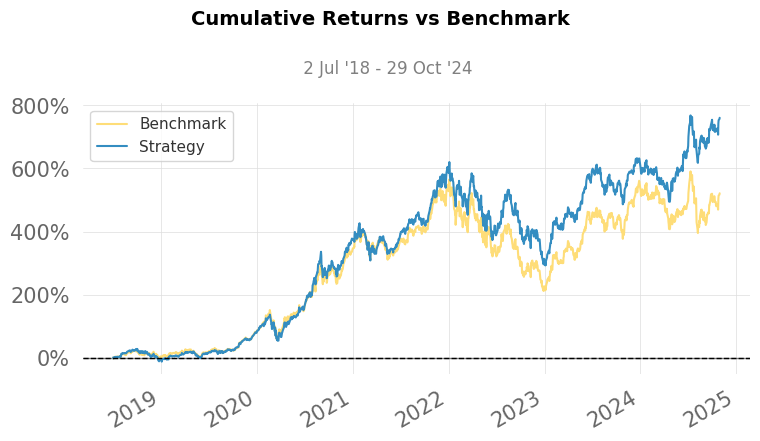

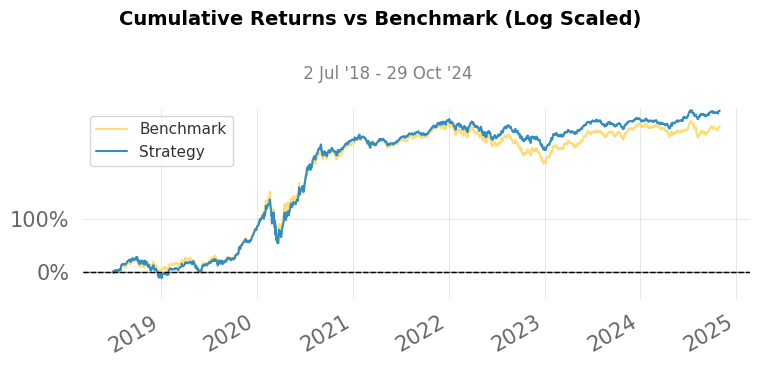

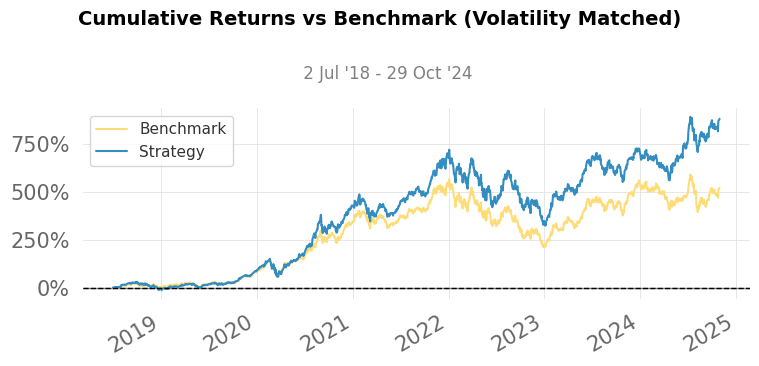

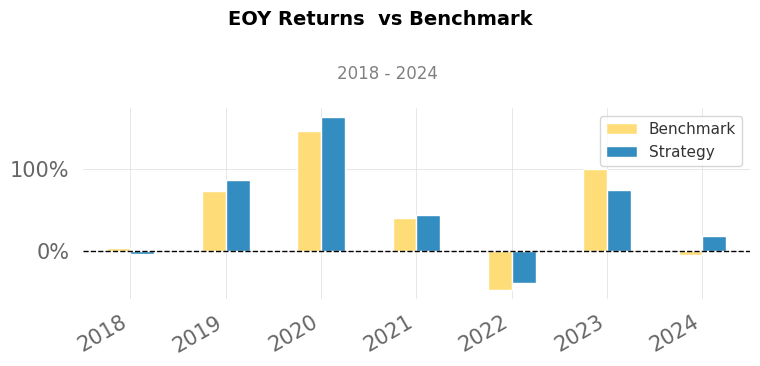

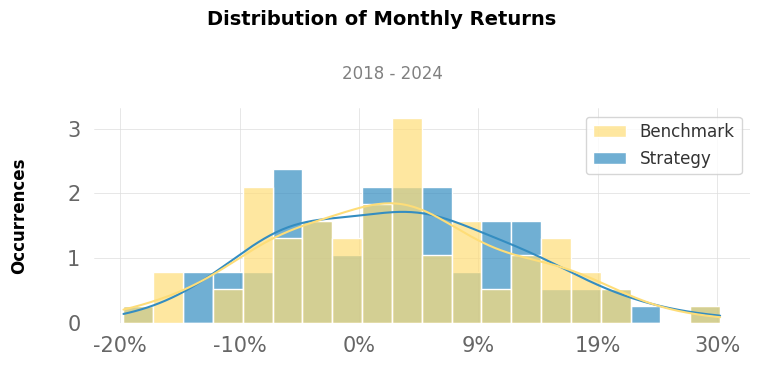

UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [71]:
# Comparing Black-Litterman portfolio to the original portfolio
qs.reports.full(black_litterman_portfolio, benchmark = portfolio)


By using the Black-Litterman Allocation Model, we were able to improve our investment portfolio's performance metrics compared to the original portfolio, where each asset was allocated a uniform weight of 25%. The Black-Litterman optimized portfolio outperformed the original portfolio in several key metrics. First, it generated higher cumulative return and CAGR, indicating a stronger overall performance. Additionally, the Sharpe and Sortino ratios were higher, demonstrating greater risk-adjusted returns. </p>
<br>

Moreover, the Black-Litterman portfolio had a lower maximum drawdown and annual volatility compared to the original portfolio, implying less downside risk and more stability to the optimized portfolio. In terms of expected returns, the Black-Litterman portfolio had higher daily, monthly, and yearly returns, and the Daily Value-at-Risk was lower, indicating a lower risk of significant losses in a day.</p>
<br>

The Black-Litterman portfolio had a lower averaged drawdown and higher recovery factor, meaning that it can bounce back faster from losses, and the beta of the optimized portfolio was much lower than that of the original portfolio, indicating lower overall market risk. Overall, the Black-Litterman optimized portfolio achieved higher returns at lower risks.</p>

Both the Markowitz Mean-Variance Model and the Black-Litterman Allocation Model effectively enhanced the performance and reduced the risk of our original portfolio by optimizing the allocation weights of Apple, Tesla, intlney, and AMD stocks.</p>
<br>
The Markowitz optimization resulted in a portfolio that primarily invested in Apple and a smaller portion in Tesla, with no allocation in intlney and AMD. On the other hand, the Black-Litterman optimization allocated funds into all four stocks, but still favored Apple with the majority of the allocation.</p>
<br>
The preference for Apple in both optimizations is not coincidental. Our initial analysis did reveal that Apple had the highest Sharpe ratio, lowest beta, and demonstrated superior performance with lower risk compared to the other stocks.</p>
<br>
It's also interesting to compare the two optimized portfolios. The Markowitz optimized portfolio outperformed the Black-Litterman portfolio in terms of cumulative returns, CAGR, Sharpe ratio, Profit Factor, Recovery Factor, and overall performance. On the other hand, the Black-Litterman portfolio demonstrated some advantages, such as lower maximum and average drawdowns, lower annual volatility, and better performance on its worst day and worst month, although the Markowitz optimization still had lower losses than the Black-Litterman optimization did on its worst year.</p>

In conclusion, portfolio optimization is a very important step to improve the risk-return relationship of a portfolio by adjusting its asset allocation. By using various mathematical models and optimization techniques, it's possible to efficiently improve performance and reduce the exposure to risk.</p>
<br>
While there are different approaches to portfolio optimization, including the Markowitz Mean-Variance model and the Black-Litterman allocation model, there is no one-size-fits-all solution. The choice of the model to use depends on the investor's risk tolerance, investment goals, and overall market conditions.</p>
<br>
To gain a deeper understanding of portfolio optimization, you can explore various research papers, journals, and books on the subject. Some sources of research to consider include books such as <a href = "https://www.amazon.com.br/Modern-Portfolio-Theory-Investment-Analysis/dp/1119427290">Modern Portfolio Theory and Investment Analysis</a> by Edwin J. Elton and Martin Jay Gruber, <a href = "https://www.amazon.com.br/Portfolio-Selection-Efficient-Diversification-Investments/dp/0300013728">Portfolio Selection</a> by Harry Markowitz, and <a href = "https://www.amazon.com.br/Active-Portfolio-Management-Quantitative-Controlling/dp/0070248826">Active Portfolio Management: A Quantitative Approach for Producing Superior Returns and Controlling Risk</a> by Richard C. Grinold and Ronald N. Kahn, which can provide valuable insights into the theory and practice of portfolio optimization.</p>

# <h1 id = "fundamental-technical-analysis" style="font-family: 'Cambria', Georgia, serif; font-weight: bold; border-bottom: 3px solid #000; padding: 8px; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">3 | Fundamental vs. Technical Analysis</h1>

<h2 id = 'which-approach' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Fundamental vs. Technical Analysis: Which Approach is Better?</h2>

Technical analysis is a very popular method used for many traders and investors to evaluate stocks and other assets based on historical price and volume data. It is an approach used to identify trends, or lack of trends, and help traders and investors to make decisions based on what they believe the future price movements will be. The underlying assumption of technical analysis is that past patterns and price movements tend to repeat themselves, so those can be used to predict future movements. Therefore, technical analysts examine charts and look for opportunities in patterns and indicators.</p>
<br>
In technical analysis, price charts can intlplay a variety of data, including open, high, low, and close prices, as well as various timeframes such as daily, weekly, and monthly charts. Volume is another important factor in technical analysis because it can provide insight into the strength of a trend or an indicator.</p>
<br>
Technical analysts use a variety of indicators, which are basically statistical calculations based on price and volume that can provide additional information about trends and potential opportunities. Some of the most commonly used indicators in technical analysis include moving averages, relative strength index (RSI), Bollinger Bands, and many others.</p>
<br>
Despite its popularity among traders, the use of technical analysis may be controversial. Some critics argue that technical analysis relies too heavily on subjective interpretations of chart patterns and that it lacks a clear theoretical foundation. They also argue that technical analysis is prone to false signals and that traders who rely on technical analysis may miss out on important fundamental factors that can influence the price of stocks.</p>
<br>
Fundamental analysis, on the other hand, focuses on analyzing a company's financial and economic fundamentals, such as revenue, earnings, and market share. Unlike technical analysis, fundamental analysis is based on the belief that a company's intrinsic value can be determined by analyzing these factors. Fundamental analysts look at financial statements, industry trends, and other relevant data to make investment decisions.</p>
<br>
It can be said that technical analysis tend to be more appropriate for short-term trading, whereas fundamental analysis may be better suited for long-term investing. Fundamental analysis provides investors with a more comprehensive understanding of a company's financial health and long-term growth prospects.</p>
<br>
It can also be said that, while humans tend to operate better with fundamental analysis, as it requires a deep understanding of the underlying factors that drive a company's value, computers may operate better with technical analysis, as it relies heavily on quantitative data that can be analyzed quickly and efficiently. An evidence to that is the fact that the use of automated trading bots that trade based on technical analysis has become increasingly popular in recent years. These bots use algorithms to identify patterns and trends in price data and make trades based on technical signals.</p>

In Python, there are quite a few libraries that are suited for both technical and fundamental analysis, and we're going to explore how to use these indicators, not only in conventional ways but also to feed machine learning models.</p>

<h2 id = 'technical-indicators' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Technical Indicators</h2>

There is a wide range of technical indicators used by traders and investors alike, each with its own unique set of benefits and drawbacks. Some of the most commonly used indicators include moving averages, which can be either simple or exponential, as well as Bollinger Bands, RSI, ATR, historic volatility, and many others.</p>
<br>
To help you better understand these indicators, I will briefly introduce some of the most commonly used ones and intlplay them on a candlestick chart.</p>

<p id = 'mas' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Moving Averages</b></p>
<br>

<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">Moving averages are commonly used to smooth out price fluctuations and identify trends in the price action of stocks, commodities, forex, crypto, and many others.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">A moving average is calculated by taking the average price of an asset over a certain period of time. This period can be as nine days or as long as 200 days, depending on the trader's preference and the asset being analyzed. The resulting line that represents the moving average is then plotted on a chart, and traders use this line to gauge the direction and strength of the trend.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">There are two types of moving averages: simple moving averages (SMA) and exponential moving averages (EMA). SMA calculates the average price of the asset over the specified period of time and gives equal weight to each data point.So, for instance, a 20-day SMA would take the sum of the closing prices over the past 20 days and divide by 20 to get the average price.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">EMA, on the other hand, gives more weight to recent price action. The formula for calculating EMA involves using a multiplier that gives more weight to the most recent price data. The formula for calculating a 9-day EMA, for example, would be:
</p>
<br><br>
<p id="prior" style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: center;">
    $EMA = (\text{Close - EMA(previous day))} \times {Multiplier} + \text{EMA(previous day)}$
</p>
<br><br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">The multiplier used depends on the length of the period used. For a 9-day EMA, the multiplier would be 2/(9+1) = 0.2 (rounded to one decimal place).</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">Traders often use moving averages to identify dynamic support and resistance levels, as well as to spot potential trend changes. When the price of an asset is above its moving average, it is considered to be in an uptrend, while a price below the moving average is considered to be in a downtrend. Traders also look for crossovers between different moving averages, which can signal a change in trend direction, such as the Golden Cross (when the 50-day moving average crosses above the 200-day moving average) and Death Cross (when the 50-day moving average crosse below the 200-day moving average).</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">Moving averages can also be used to set stop loss and take profit levels for trades. For example, a trader may place a stop loss order below the moving average to limit their losses if the trend reverses.</p>
<br>
<br>

<p id = 'bbs' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Bollinger Bands</b></p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">Bollinger Bands are an exteremely popular tool used by traders and analysts to measure volatility and to identify potential buy and sell opportunities.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">The Bollinger Bands consist of three lines on a chart: a simple moving average (SMA) in the middle,typically a 20-day moving average, and two bands that are set at a intltance of two standard deviations away from the SMA. When the market is volatile, the bands widen, and when the market is less volatile, the bands contract. The intltance between the bands can therefore be used as an indicator of volatility.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">Usually, traders use these bands to identify possible buying and selling entries. When the price touches or crosses below the lower band, it may be considered oversold and a potential buy signal. Conversely, when the price touches or crosses above the upper band, it may be considered overbought and a potential sell signal.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">To obtain the Bollinger Bands values, there are three important steps:</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">1. Calculate the 20-day SMA of the stock's price.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">2. Calculate the standard deviation of the stocks's price over the past 20 periods.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">3.Calculate the upper and lower bands by adding or subtracting two standard deviations from the 20-day SMA.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">The formula to calculate the upper band is:</p>
<br><br>
<p id="prior" style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: center;">$Upper\ Band = 20\text{day}\ SMA + (2 \times \sigma)$
</p>
<br><br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">Whereas the formula for the lower band is:</p>
<br><br>
<p id="prior" style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: center;">
    $Lower\ Band = 20\text{day}\ SMA - (2 \times \sigma)$
</p>
<br>
<br>

<p id = 'rsi' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Relative Strenght Index (RSI)</b></p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">The RSI is another popular technical analysis tool used by traders and analysts in financial markets. It measures the strength of price action and can be used to identify possible buy and sell opportunities.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">The RSI is calculated by comparing the average gains and losses of a stock over a specific period of time. The formula for calculating the RSI involves two steps:</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">First, you calculate the Relative Strength (RS) of the stock, which is the ratio of the average gains to the average losses over time, which is typically the last 14 days.</p>
<br><br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><center>$\text{RS} = \frac{Average\; Gain}{Average\; Loss}$</center></p>
<br><br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">In order to obtain the average gain or loss, the difference between the closing price of the current day and the previous day is taken. If that difference is positive, then it is considered a gain, but if that difference is negative, it is considered a loss.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">The next step is to obtain the RSI using the RS value. The RSI ranges from 0 to 100 and is plotted on a chart.</p>
<br><br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><center>$\text{RSI} = 100 - \frac{100}{1 + \text{RS}}$</center></p>
<br><br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">When the RSI is above 70, it is considered an overbought region and could signal a potential opportunity for selling. When it is below the value of 30, it is considered to be on an oversold region and could signal a potential opportunity for buying low.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">The RSI is also popularly used to identify divergences between the RSI and price, which can indicate the loss of <i>momentum</i>, i.e. strenght, in the current trend and suggest a possible reversal.</p>
<br>
<br>

<p id = 'atr' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Average True Range (ATR)</b></p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">The Average True Range (ATR) is yet another commong indicator used to measure the volatility of price action and help traders to identify potential buy and sell opportunities.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">It is calculated by comparing the true range of a stock over a specific period of time. The true range is the maximum value of the three calculations below:</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">1.The difference between the current high and the previous close.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">2. The difference between the current low and the previous close.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">The difference between the current high and the current low.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">Before obtaining the ATR, we need to first obtain the <b>true range</b> through the following formula:</p>
<br><br>
<center>$\text {TR} = \text{max(high - low, abs(high - close_prev), abs(low - close_prev))}$</center>
<br><br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">Where:</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><i>High</i> is the current day's highest price</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><i>Low</i> is the current day's lowest price</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><i>close_prev</i> is the previous day's closing price</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">The ATR ranges from 0 to infinity, and the higher its value, the higher may be the volatility in price action, while the opposite is true for a lower ATR value.</p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">Traders and analysts may use the ATR to set stop-loss and take-profit levels, as well as to identify potential trend reversals. For example, if the ATR value is increasing, it could indicate that a trend reversal is likely to occur.</p>
<br>

In [72]:
# Downloading Apple Stocks
aapl = yf.download('AAPL', start = '2010-07-01', end = '2023-02-11')

[*********************100%***********************]  1 of 1 completed


In [73]:
aapl # intlplaying data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-07-01 00:00:00+00:00,7.485879,8.874286,9.100000,8.686429,9.082143,1022896000
2010-07-02 00:00:00+00:00,7.439485,8.819286,8.961786,8.685714,8.946071,693842800
2010-07-06 00:00:00+00:00,7.490399,8.879643,9.028571,8.791429,8.964286,615235600
2010-07-07 00:00:00+00:00,7.792870,9.238214,9.241786,8.919643,8.946071,654556000
2010-07-08 00:00:00+00:00,7.775396,9.217500,9.389286,9.103214,9.374286,738144400
...,...,...,...,...,...,...
2023-02-06 00:00:00+00:00,150.151016,151.729996,153.100006,150.779999,152.570007,69858300
2023-02-07 00:00:00+00:00,153.040634,154.649994,155.229996,150.639999,150.639999,83322600


In [74]:
aapl.dtypes # Printing data types

,,0
Price,Ticker,
Adj Close,AAPL,float64
Close,AAPL,float64
High,AAPL,float64
Low,AAPL,float64
Open,AAPL,float64
Volume,AAPL,int64


<br>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">After obtaining historical data of Apple stocks with yfinance, we may use Plotly to plot a Candlestick chart containing information on price and volume.</p>
<br>
<br>

In [75]:
# Plotting candlestick chart without indicators
fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.7, 0.3])
fig.add_trace(go.Candlestick(x = aapl.index,
                             open = aapl['Open'],
                             high = aapl['High'],
                             low = aapl['Low'],
                             close = aapl['Adj Close'],
                             name = 'AAPL'),
              row = 1, col = 1)


# Plotting volume chart on the second row
fig.add_trace(go.Bar(x = aapl.index,
                     y = aapl['Volume'],
                     name = 'Volume',
                     marker = dict(color = 'orange', opacity = 1.0)),
              row = 2, col = 1)

# Plotting annotation
fig.add_annotation(text = 'Apple (AAPL)',
                    font = dict(color = 'white', size = 40),
                    xref = 'paper', yref = 'paper',
                    x = 0.5, y = 0.65,
                    showarrow = False,
                    opacity = 0.2)

# Configuring layout
fig.update_layout(title = 'AAPL Candlestick Chart From July 1st, 2010 to February 10th, 2023',
                  yaxis = dict(title = 'Price (USD)'),
                  height = 1000,
                 template = 'plotly_dark')

# Configuring axes and subplots
fig.update_xaxes(rangeslider_visible = False, row = 1, col = 1)
fig.update_xaxes(rangeslider_visible = False, row = 2, col = 1)
fig.update_yaxes(title_text = 'Price (USD)', row = 1, col = 1)
fig.update_yaxes(title_text = 'Volume', row = 2, col = 1)

fig.show()

<br>
<br>
Above, it's possible to see a daily candlestick chart containing price and volume of Apple stocks traded from July 1st, 2010 to February 10th, 2023. The candlestick chart makes it easy to see information on the opening, closing, high, and low prices of each trading day, as well as the overall trend in the last 13 years.</p>
<br>
The use of the 'Adj Close' column instead of the 'Close' column to plot the chart above is due to the adjustment of historical prices for dividends and stock splits. The 'Adj Close' value represents the closing price adjusted for these factors, which allows for a more accurate representation of the stock's true price over time.</p>
<br>
The volume bars below the candlestick chart intlplay the financial volume of shares traded for each day.</p>
<br>

<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">After taking a brief look at a candlestick chart without indicators, we can go on and add a few indicators to our Apple stocks dataframe and intlplay them on the candlestick chart.</p>

In [76]:
# Adding Moving Averages
aapl['EMA9'] = aapl['Adj Close'].ewm(span = 9, adjust = False).mean() # Exponential 9-Period Moving Average
aapl['SMA20'] = aapl['Adj Close'].rolling(window = 20).mean() # Simple 20-Period Moving Average
aapl['SMA50'] = aapl['Adj Close'].rolling(window = 50).mean() # Simple 50-Period Moving Average
aapl['SMA100'] = aapl['Adj Close'].rolling(window = 100).mean() # Simple 100-Period Moving Average
aapl['SMA200'] = aapl['Adj Close'].rolling(window = 200).mean() # Simple 200-Period Moving Average

# Adding RSI for 14-periods
delta = aapl['Adj Close'].diff() # Calculating delta
gain = delta.where(delta > 0,0) # Obtaining gain values
loss = -delta.where(delta < 0,0) # Obtaining loss values
avg_gain = gain.rolling(window = 14).mean() # Measuring the 14-period average gain value
avg_loss = loss.rolling(window = 14).mean() # Measuring the 14-period average loss value
rs = avg_gain/avg_loss # Calculating the RS
aapl['RSI'] = 100 - (100 / (1 + rs)) # Creating an RSI column to the Data Frame

# Adding Bollinger Bands 20-periods
aapl['BB_UPPER'] = aapl['SMA20'] + 2 * aapl['Adj Close'].rolling(window = 20).std() # Upper Band
aapl['BB_LOWER'] = aapl['SMA20'] - 2 * aapl['Adj Close'].rolling(window = 20).std() # Lower Band

# Adding ATR 14-periods
aapl['TR'] = pd.DataFrame(np.maximum(np.maximum(aapl['High'] - aapl['Low'], abs(aapl['High'] - aapl['Adj Close'].shift())), abs(aapl['Low'] - aapl['Adj Close'].shift())), index = aapl.index)
aapl['ATR'] = aapl['TR'].rolling(window = 14).mean() # Creating an ART column to the Data Frame

ValueError: Cannot set a DataFrame with multiple columns to the single column BB_UPPER

In [77]:
aapl.tail(50) # Plotting last 50 trading days with indicators

Price,Adj Close,Close,High,Low,Open,Volume,EMA9,SMA20,SMA50,SMA100,SMA200,RSI
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,,
2022-11-30 00:00:00+00:00,146.489532,148.029999,148.720001,140.550003,141.399994,111380900,145.320168,144.064515,144.286618,151.074528,152.185234,64.667829
2022-12-01 00:00:00+00:00,146.766602,148.309998,149.130005,146.610001,148.210007,71250400,145.609454,144.238692,144.184582,151.103162,152.067958,52.172600
2022-12-02 00:00:00+00:00,146.271805,147.809998,148.000000,145.649994,145.960007,65447400,145.741925,144.691926,144.092014,151.130499,151.949390,46.932799
2022-12-05 00:00:00+00:00,145.104095,146.630005,150.919998,145.770004,147.770004,68826400,145.614359,145.100133,144.021736,151.116758,151.843061,47.301260
2022-12-06 00:00:00+00:00,141.422821,142.910004,147.300003,141.919998,147.070007,64727200,144.776051,145.297558,143.871114,151.049433,151.726108,39.040937
2022-12-07 00:00:00+00:00,139.473312,140.940002,143.369995,140.000000,142.190002,69721100,143.715503,145.368809,143.661940,150.993196,151.614087,38.195557
2022-12-08 00:00:00+00:00,141.165497,142.649994,143.520004,141.100006,142.360001,62128300,143.205502,145.753760,143.524547,150.915109,151.531460,37.783841
2022-12-09 00:00:00+00:00,140.680618,142.160004,145.570007,140.899994,142.339996,76097000,142.700525,145.520712,143.522884,150.812047,151.433257,36.145704


In [78]:
# Plotting Candlestick charts with indicators
fig = make_subplots(rows = 4, cols = 1, shared_xaxes = True, vertical_spacing = 0.05,row_heights = [0.6, 0.10, 0.10, 0.20])

# Candlestick
fig.add_trace(go.Candlestick(x = aapl.index,
                             open = aapl['Open'],
                             high = aapl['High'],
                             low = aapl['Low'],
                             close = aapl['Adj Close'],
                             name = 'AAPL'),
              row = 1, col = 1)

# Moving Averages
fig.add_trace(go.Scatter(x = aapl.index,
                         y = aapl['EMA9'],
                         mode = 'lines',
                         line = dict(color = '#90EE90'),
                         name = 'EMA9'),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x = aapl.index,
                         y = aapl['SMA20'],
                         mode = 'lines',
                         line = dict(color = 'yellow'),
                         name = 'SMA20'),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x = aapl.index,
                         y = aapl['SMA50'],
                         mode = 'lines',
                         line = dict(color = 'orange'),
                         name = 'SMA50'),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x = aapl.index,
                         y = aapl['SMA100'],
                         mode = 'lines',
                         line = dict(color = 'purple'),
                         name = 'SMA100'),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x = aapl.index,
                         y = aapl['SMA200'],
                         mode = 'lines',
                         line = dict(color = 'red'),
                         name = 'SMA200'),
              row = 1, col = 1)

# Bollinger Bands
fig.add_trace(go.Scatter(x = aapl.index,
                         y = aapl['BB_UPPER'],
                         mode = 'lines',
                         line = dict(color = '#00BFFF'),
                         name = 'Upper Band'),
              row = 1, col = 1)

fig.add_trace(go.Scatter(x = aapl.index,
                         y = aapl['BB_LOWER'],
                         mode = 'lines',
                         line = dict(color = '#00BFFF'),
                         name = 'Lower Band'),
              row = 1, col = 1)

fig.add_annotation(text = 'Apple (AAPL)',
                    font = dict(color = 'white', size = 40),
                    xref = 'paper', yref = 'paper',
                    x = 0.5, y = 0.65,
                    showarrow = False,
                    opacity = 0.2)


# Relative Strengh Index (RSI)
fig.add_trace(go.Scatter(x = aapl.index,
                         y = aapl['RSI'],
                         mode = 'lines',
                         line = dict(color = '#CBC3E3'),
                         name = 'RSI'),
              row = 2, col = 1)

# Adding marking lines at 70 and 30 levels
fig.add_shape(type = "line",
              x0 = aapl.index[0], y0 = 70, x1 = aapl.index[-1], y1 = 70,
              line = dict(color = "red", width = 2, dash = "dot"),
              row = 2, col = 1)
fig.add_shape(type = "line",
              x0 = aapl.index[0], y0 = 30, x1 = aapl.index[-1], y1 = 30,
              line = dict(color = "#90EE90", width = 2, dash = "dot"),
              row = 2, col = 1)

# Average True Range (ATR)
fig.add_trace(go.Scatter(x = aapl.index,
                         y = aapl['ATR'],
                         mode = 'lines',
                         line = dict(color = '#00BFFF'),
                         name = 'ATR'),
              row = 3, col = 1)


# Volume
fig.add_trace(go.Bar(x = aapl.index,
                     y = aapl['Volume'],
                     name = 'Volume',
                     marker = dict(color = 'orange', opacity = 1.0)),
              row = 4, col = 1)


# Layout
fig.update_layout(title = 'AAPL Candlestick Chart From July 1st, 2010 to February 10th, 2023',
                  yaxis = dict(title = 'Price (USD)'),
                  height = 1000,
                 template = 'plotly_dark')

# Axes and subplots
fig.update_xaxes(rangeslider_visible = False, row = 1, col = 1)
fig.update_xaxes(rangeslider_visible = False, row = 4, col = 1)
fig.update_yaxes(title_text = 'Price (USD)', row = 1, col = 1)
fig.update_yaxes(title_text = 'RSI', row = 2, col = 1)
fig.update_yaxes(title_text = 'ATR', row = 3, col = 1)
fig.update_yaxes(title_text = 'Volume', row = 4, col = 1)

fig.show()

KeyError: 'BB_UPPER'

Finally, the Candlestick chart above is a full representation of the price and volume over time, along with additional indicators such as moving averages, Bollinger Bands, Relative Strength Index, and ATR.</p>
<br>
The amount of indicators on screen may appear overwhelming at first glance, but this is done on purpose! Don't forget that with <b>Plotly's</b> interactive features, you have the flexibility to customize the way you visualize the chart to suit your preferences by selecting the time period and indicators you wish to view.</p>
<br>
In the first chart below, we have intlplayed only the 9-period exponential moving average and the 20-period simple moving average on the price row. This simplifies the visual representation of the data and allows you to focus only on these two indicators.</p>
<br>
<br>
<img src = "https://i.imgur.com/PKQRUDp.png">
<br>
<br>
In the next chart, we have chosen to intlplay only the Bollinger Bands with the 20-period simple moving average on the price row.</p>
<br>
<br>
<img src = "https://i.imgur.com/u6RuKJf.png">
<br>
<br>
Feel free to experiment with the Candlestick chart as you like!</p>

You've seen that, with Python, it is extremely easy not only to calculate, but also to visualize a wide variety of technical indicators to analyze stocks, as well as other assets.</p>
<br>
Beyond that, these indicators can be used as features for machine learning models, and Python's variety makes it easy to backtest strategies based on technical analysis and see how well we could perform buying and selling stocks based on these strategies, which is something we will approach later on in this notebook.</p>
<br>

<h2 id = 'fundamental-indicators' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Fundamental Indicators</h2>

Just as we have a broad range of technical indicators, the same applies to fundamental indicators used by investors when they're looking for relevant information when deciding whether to invest in a company or not.</p>
<br>
The most commonly used fundamental indicators include earnings per share (EPS), price-to-earnings ratio (P/E ratio), return on equity (ROE), debt-to-equity ratio, and dividend yield. These indicators provide insights into the company's profitability, valuation, efficiency, financial leverage, and dividend payments. Overall, fundamental analysis involves examining a company's financial and economic data to evaluate its financial health and potential for growth. </p>
<br>
I'll also briefly present to you some fundamental indicators, so we can make comparison on the stocks we've been working on for now. </p>

<p id = "eps" style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Earnings per Share (EPS)</b></p>
<br>
Earnings per share (EPS) is an indicator that measures a company's net profit per the number of stocks available in the stock market. It is calculated by dividing the net profit by the total number of shares. The EPS provides a way for investors to evaluate a company's profitability on a per-share basis. A higher EPS indicates a company that is more profitable, which may lead to increased demand for its shares and a higher stock price in the future.</p>
<br>
<br>

<p id = 're' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Price-to-Earnings Ratio (P/E)</b></p>
<br>
The P/E ratio indicator serves to compare a company's stock price to its earnings per share (EPS). It is calculated by dividing the current stock price by the EPS. The P/E ratio provides investors with insight into how much they are paying for each dollar of earnings. A higher P/E ratio indicates that investors are willing to pay more for each dollar of earnings, which may suggest that they expect the company to grow in the future.</p>
<br>
<br>

<p id = 'roe' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Return on Equity (ROE)</b></p>
<br>
The ROE indicator measures a company's profitability by calculating the amount of net income generated as a percentage of the company's shareholder equity. It is calculated by dividing the net income by the shareholder equity. The ROE provides a way for investors to evaluate how effectively a company is using its equity to generate profits. A higher ROE indicates a more efficient use of shareholder equity, which can lead to increased demand for shares and higher stock price, as well as increase in company's profits in the future.</p>
<br>
<br>

<p id = 'dte' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Debt-to-Equity Ratio</b></p>
<br>
The debt-to-equity ratio is an indicator that measures a company's leverage by comparing its total liabilities to its shareholder equity. It is calculated by dividing the total liabilities by the shareholder equity. The debt-to-equity ratio provides investors with insight into how much debt a company is using to finance its operations. A higher debt-to-equity ratio suggests that a company is relying more on debt financing, which increase its financial risk.</p>
<br>
<br>

<p id = 'dy' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Dividend Yield</b></p>
<br>
The dividend yield is an indicator that measures the annual dividend income generated by a company's stock relative to its current market price. It is calculated by dividing the annual dividend per share by the current market price per share. The dividend yield provides a way for investors to evaluate the income potential of a company's stock. A higher dividend yield indicates that the company is paying out a larger portion of its profits as dividends, which can be attractive to investors looking for passive income.</p>
<br>
<br>

<div class="alert alert-block alert-warning">  
<b>Important Note:</b> As of March 2023 it seems that yfinance, as well as other libraries, are having the <b>Exception: yfinance failed to decrypt Yahoo data response</b> issue. I've tried other methods to obtain these indicators, but none of them worked, or the data obtained didn't seem to be reliable at all. I'll manually add the indicators and print them below, however, I'll leave a code cell demonstrating how you would usually execute this extraction using yfinance, so you can reproduce it when this issue gets solved.
</div>

In [ ]:
# Getting AAPL data
# aapl = yf.Ticker("AAPL")
# aapl_eps = aapl.info['trailingEps']
# aapl_pe_ratio = aapl.info['trailingPE']
# aapl_roe = aapl.info['returnOnEquity'] * 100
# aapl_dy = aapl.info['dividendYield'] * 100

# Getting AMD data
# amd = yf.Ticker("AMD")
# amd_eps = amd.info['trailingEps']
# amd_pe_ratio = amd.info['trailingPE']
# amd_roe = amd.info['returnOnEquity'] * 100
# amd_dy = amd.info['dividendYield'] * 100

In [79]:
# AAPL indicators (obtained from https://finance.yahoo.com/quote/AAPL/key-statistics?p = AAPL)

aapl_eps = 5.89
aapl_pe_ratio = 26.12
aapl_roe = 147.94
aapl_dy = 0.60

# AMD indicators (obtained from https://finance.yahoo.com/quote/AMD/key-statistics?p = AMD)
amd_eps = 0.82
amd_pe_ratio = 96.62
amd_roe = 4.24
amd_dy = 0.00

# Printing data

print('Apple (AAPL) Fundamental Indicators: ')

print('Earnings per Share (EPS): ',aapl_eps)
print('Price-to-Earnings Ratio (P/E): ', aapl_pe_ratio)
print('Return on Equity (ROE): ', aapl_roe,"%")
print('Dividend Yield: ', aapl_dy,"%")

print('AMD Fundamental Indicators: ')

print('Earnings per Share (EPS): ',amd_eps)
print('Price-to-Earnings Ratio (P/E): ', amd_pe_ratio)
print('Return on Equity (ROE): ',amd_roe,"%")
print('Dividend Yield: ', amd_dy,"%")


Apple (AAPL) Fundamental Indicators: 
Earnings per Share (EPS):  5.89
Price-to-Earnings Ratio (P/E):  26.12
Return on Equity (ROE):  147.94 %
Dividend Yield:  0.6 %
AMD Fundamental Indicators: 
Earnings per Share (EPS):  0.82
Price-to-Earnings Ratio (P/E):  96.62
Return on Equity (ROE):  4.24 %
Dividend Yield:  0.0 %


<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">To briefly draw some conclusion on the indicators above, it can be stated that, compared to AMD, AAPL has a higher EPS, indicating that they are generating a higher net profit per share. AAPL also has a lower P/E ratio, meaning that the stock is less expensive per unit of earnings. It also has an incredibly high ROE, which suggests that they are doing a good job of managing shareholders' equity to generate profits. On the other hand, AMD has a relatively low ROE, indicating that the company is not as profitable when compared to AAPL. AAPL also has a modest dividend yield of 0.6%, indicating that they pay dividends to shareholders, while AMD does not pay any dividends at all. </p>
<br>
<p id = 'prior' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;">Overall, it can be inferred that the indicators above suggest that AAPL is a more profitable company with a more mature business model than AMD.</p>

# <h1 id = "backtesting" style="font-family: 'Cambria', Georgia, serif; font-weight: bold; border-bottom: 3px solid #000; padding: 8px; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">4 | Backtesting</h1>

Backtesting is the process of evaluating the performance of a trading strategy based on historical market data. In other words, it involves testing a trading strategy using historical data to see how it would have performed if it had been applied in the past. This allows traders and investors to assess the profitability and effectiveness of their trading strategies before applying them to live trading.</p>
<br>
With Python, it is extremely easy to perform backtesting on historic data to se how a portfolio performs on a single strategy, or multiple different strategies applied to many financial securities.</p>
<br>
Below, we're going to backtest the RSI strategy and the moving average crossover strategy, which are two different types of trading strategies, on the EUR/USD currency pair, one of the most traded pair in Forex, in three different timeframes.</p>
<br>

<h2 id = 'rsi-backtest' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">RSI Backtesting</h2>
<br>
The Relative Strength Index (RSI), as mentioned before, can be used to identify overbought and oversold regions, which allows traders to either sell or buy when it is above 70 or below 30.</p>
<br>
This kind of strategy can be seen as countertrend strategy, as traders are looking for good entry points to open a position that goes against the current trend.</p>
<br>
For this backtesting, we will buy whenever the RSI goes below 30 and sell whenever it goes above 70.</p>
<br>
Consider that this backtesting is very simple, just to give you a direction to look for when you perform your own backtests. Usually, it is also important to consider the taxes, slippage, and other costs you'll have while trading. Here, we're roughly talking about gross profits and losses, so keep this in mind.</p>
<br>
For this backtesting, let's consider an initial capital of 100.00 dollars. Then, we're going to print the initial capital, the number of trades, and the final capital after the backtest.</p>

<p id ='hourly-rsi-backtest' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Hourly Data</b></p>

In [80]:
# Loading hourly data for the EUR/USD pair
end_date = dt.datetime.now() # Defining the datetime for March 21st
start_date = end_date - dt.timedelta(days = 729) # Loading hourly data for the last 729 days

hourly_eur_usd = yf.download('EURUSD = X', start = start_date, end = end_date, interval = '1h')
hourly_eur_usd

[*********************100%***********************]  3 of 3 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['=', 'EURUSD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Price                     Adj Close                   Close                    \
Ticker                            = EURUSD          X     = EURUSD          X   
2022-11-14 14:30:00+00:00       NaN    NaN  24.280001   NaN    NaN  24.280001   
2022-11-14 15:30:00+00:00       NaN    NaN  24.240000   NaN    NaN  24.240000   
2022-11-14 16:30:00+00:00       NaN    NaN  24.295000   NaN    NaN  24.295000   
2022-11-14 17:30:00+00:00       NaN    NaN  24.331800   NaN    NaN  24.331800   
2022-11-14 18:30:00+00:00       NaN    NaN  24.411600   NaN    NaN  24.411600   
...                             ...    ...        ...   ...    ...        ...   
2024-11-08 16:30:00+00:00       NaN    NaN  41.659901   NaN    NaN  41.659901   
2024-11-08 17:30:00+00:00       NaN    NaN  41.430000   NaN    NaN  41.430000   
2024-11-08 18:30:00+00:00       NaN    NaN  41.450001   NaN    NaN  41.450001   
2024-11-08 19:30:00+00:00       NaN    NaN  41.320000   NaN    NaN  41.320000   
2024-11-08 20:30:00+00:00       NaN    NaN  41.259998   NaN    NaN  41.259998   

Price                     High                   Low                   Open  \
Ticker                       = EURUSD          X   = EURUSD          X    =   
2022-11-14 14:30:00+00:00  NaN    NaN  24.440001 NaN    NaN  23.340000  NaN   
2022-11-14 15:30:00+00:00  NaN    NaN  24.740000 NaN    NaN  24.150000  NaN   
2022-11-14 16:30:00+00:00  NaN    NaN  24.450001 NaN    NaN  24.110001  NaN   
2022-11-14 17:30:00+00:00  NaN    NaN  24.350000 NaN    NaN  24.150000  NaN   
2022-11-14 18:30:00+00:00  NaN    NaN  24.555000 NaN    NaN  24.322100  NaN   
...                        ...    ...        ...  ..    ...        ...  ...   
2024-11-08 16:30:00+00:00  NaN    NaN  42.560001 NaN    NaN  41.410000  NaN   
2024-11-08 17:30:00+00:00  NaN    NaN  41.840000 NaN    NaN  41.250000  NaN   
2024-11-08 18:30:00+00:00  NaN    NaN  41.669998 NaN    NaN  41.382000  NaN   
2024-11-08 19:30:00+00:00  NaN    NaN  41.520000 NaN    NaN  41.250000  NaN   
2024-11-08 20:30:00+00:00  NaN    NaN  41.400002 NaN    NaN  41.160000  NaN   

Price                                       Volume                  
Ticker                    EURUSD          X      = EURUSD        X  
2022-11-14 14:30:00+00:00    NaN  23.370001    NaN    NaN  2268197  
2022-11-14 15:30:00+00:00    NaN  24.280001    NaN    NaN  1745416  
2022-11-14 16:30:00+00:00    NaN  24.239100    NaN    NaN  1127956  
2022-11-14 17:30:00+00:00    NaN  24.280001    NaN    NaN   906008  
2022-11-14 18:30:00+00:00    NaN  24.334801    NaN    NaN   900769  
...                          ...        ...    ...    ...      ...  
2024-11-08 16:30:00+00:00    NaN  42.439999    NaN    NaN   803322  
2024-11-08 17:30:00+00:00    NaN  41.650002    NaN    NaN   398742  
2024-11-08 18:30:00+00:00    NaN  41.400002    NaN    NaN   281383  
2024-11-08 19:30:00+00:00    NaN  41.439999    NaN    NaN   443156  
2024-11-08 20:30:00+00:00    NaN  41.314999    NaN    NaN   670702  

[3484 rows x 18 columns]

In [81]:
# Calculating the RSI with the TA library
hourly_eur_usd['rsi'] = ta.momentum.RSIIndicator(hourly_eur_usd['Adj Close'], window = 14).rsi()
hourly_eur_usd

ValueError: Data must be 1-dimensional, got ndarray of shape (3484, 3) instead

In [ ]:
# Plotting candlestick chart for hourly EUR/USD
fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, vertical_spacing = 0.05,row_heights = [0.7, 0.3])
fig.add_trace(go.Candlestick(x = hourly_eur_usd.index,
                             open = hourly_eur_usd['Open'],
                             high = hourly_eur_usd['High'],
                             low = hourly_eur_usd['Low'],
                             close = hourly_eur_usd['Adj Close'],
                             name = 'EUR/USD'), row = 1, col = 1)

# Adding annotation
fig.add_annotation(text = 'EUR/USD 1HR',
                    font = dict(color = 'white', size = 40),
                    xref = 'paper', yref = 'paper',
                    x = 0.5, y = 0.65,
                    showarrow = False,
                    opacity = 0.2)


# Relative Strengh Index (RSI) Indicator
fig.add_trace(go.Scatter(x = hourly_eur_usd.index,
                         y = hourly_eur_usd['rsi'],
                         mode = 'lines',
                         line = dict(color = '#CBC3E3'),
                         name = 'RSI'),
              row = 2, col = 1)


# Adding marking lines at 70 and 30 levels
fig.add_shape(type = "line",
              x0 = hourly_eur_usd.index[0], y0 = 70, x1 = hourly_eur_usd.index[-1], y1 = 70,
              line = dict(color = "red", width = 2, dash = "dot"),
              row = 2, col = 1)
fig.add_shape(type = "line",
              x0 = hourly_eur_usd.index[0], y0 = 30, x1 = hourly_eur_usd.index[-1], y1 = 30,
              line = dict(color = "#90EE90", width = 2, dash = "dot"),
              row = 2, col = 1)

# Layout
fig.update_layout(title = 'EUR/USD Hourly Candlestick Chart from 2021 to 2023',
                  yaxis = dict(title = 'Price'),
                  height = 1000,
                 template = 'plotly_dark')

# Configuring subplots
fig.update_xaxes(rangeslider_visible = False)
fig.update_yaxes(title_text = 'Price', row = 1)
fig.update_yaxes(title_text = 'RSI', row = 2)

fig.show()

In [ ]:
# Defining the parameters for the RSI strategy
rsi_period = 14
overbought = 70
oversold = 30

# Creating a new column to hold the signals
hourly_eur_usd['signal'] = 0 # When we're not positioned, 'signal' = 0

# Generating the entries
for i in range(rsi_period, len(hourly_eur_usd)):
    if hourly_eur_usd['rsi'][i] > overbought and hourly_eur_usd['rsi'][i - 1] < =  overbought:
        hourly_eur_usd['signal'][i] = -1 # We sell when 'signal' = -1
    elif hourly_eur_usd['rsi'][i] < oversold and hourly_eur_usd['rsi'][i - 1] > =  oversold:
        hourly_eur_usd['signal'][i] = 1 # We buy when 'signal' = 1

# Calculating the pair's daily returns
hourly_eur_usd['returns'] = hourly_eur_usd['Adj Close'].pct_change()
hourly_eur_usd['cumulative_returns'] = (1 + hourly_eur_usd['returns']).cumprod() - 1 # Total returns of the period

# Applying the signals to the returns
hourly_eur_usd['strategy_returns'] = hourly_eur_usd['signal'].shift(1)  *  hourly_eur_usd['returns']

# Calculating the cumulative returns of the strategy
hourly_eur_usd['cumulative_strategy_returns'] = (1 + hourly_eur_usd['strategy_returns']).cumprod() - 1

# Setting the initial capital to $100
initial_capital = 100

# Calculating total portfolio value
hourly_eur_usd['portfolio_value'] = (1 + hourly_eur_usd['strategy_returns']).cumprod()  *  initial_capital

# Printing the number of trades, initial capital, and final capital
num_trades = hourly_eur_usd['signal'].abs().sum()
final_capital = hourly_eur_usd['portfolio_value'].iloc[-1]
total_return = (final_capital - initial_capital) / initial_capital  *  100


print(f"Number of trades: {num_trades}")
print(f"Initial capital: ${initial_capital}")
print(f"Final capital: ${final_capital:.2f}")
print(f"Total return: {total_return:.2f}%")


# Plotting the portfolio total value
fig = go.Figure()

fig.add_trace(go.Scatter(x = hourly_eur_usd.index,
                         y = hourly_eur_usd['portfolio_value'].round(2),
                         mode = 'lines',
                         line = dict(color = '#00BFFF'),
                         name = 'Portfolio Value'))

fig.update_layout(title = 'Portfolio - RSI Strategy on Hourly Data',
                  xaxis_title = 'Date',
                  yaxis_title = 'Value ($)',
                  template = 'plotly_dark',
                 height = 600)

fig.show()

<p id = 'daily-rsi-backtest' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Daily Data</b></p>

In [ ]:
# Loading daily EUR/USD pair data for the last eight years
daily_eur_usd = yf.download('EURUSD = X', start = '2015-03-13', end = '2023-03-13', interval = '1d')

In [ ]:
daily_eur_usd # Daily dataframe

In [ ]:
# Calculating the RSI with the TA library
daily_eur_usd["rsi"] = ta.momentum.RSIIndicator(daily_eur_usd["Adj Close"], window = 14).rsi()
daily_eur_usd # intlplaying dataframe

In [ ]:
# Plotting candlestick chart for daily EUR/USD
fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, vertical_spacing = 0.05,row_heights = [0.7, 0.3])
fig.add_trace(go.Candlestick(x = daily_eur_usd.index,
                             open = daily_eur_usd['Open'],
                             high = daily_eur_usd['High'],
                             low = daily_eur_usd['Low'],
                             close = daily_eur_usd['Adj Close'],
                             name = 'EUR/USD'), row = 1, col = 1)

# Annotation
fig.add_annotation(text = 'EUR/USD 1D',
                    font = dict(color = 'white', size = 40),
                    xref = 'paper', yref = 'paper',
                    x = 0.5, y = 0.65,
                    showarrow = False,
                    opacity = 0.2)


# Relative Strengh Index (RSI)
fig.add_trace(go.Scatter(x = daily_eur_usd.index,
                         y = daily_eur_usd['rsi'],
                         mode = 'lines',
                         line = dict(color = '#CBC3E3'),
                         name = 'RSI'),
              row = 2, col = 1)


# Adding marking lines at 70 and 30 levels
fig.add_shape(type = "line",
              x0 = daily_eur_usd.index[0], y0 = 70, x1 = daily_eur_usd.index[-1], y1 = 70,
              line = dict(color = "red", width = 2, dash = "dot"),
              row = 2, col = 1)
fig.add_shape(type = "line",
              x0 = daily_eur_usd.index[0], y0 = 30, x1 = daily_eur_usd.index[-1], y1 = 30,
              line = dict(color = "#90EE90", width = 2, dash = "dot"),
              row = 2, col = 1)

fig.update_layout(title = 'EUR/USD Daily Candlestick Chart from 2015 to 2023',
                  yaxis = dict(title = 'Price'),
                  height = 1000,
                 template = 'plotly_dark')

# Configuring subplots
fig.update_xaxes(rangeslider_visible = False)
fig.update_yaxes(title_text = 'Price', row = 1)
fig.update_yaxes(title_text = 'RSI', row = 2)

fig.show()

In [ ]:
# Defining the parameters for the RSI strategy
rsi_period = 14
overbought = 70
oversold = 30

# Creating a new column to hold the signals
daily_eur_usd['signal'] = 0

# Generating entry signals
for i in range(rsi_period, len(daily_eur_usd)):
    if daily_eur_usd['rsi'][i] > overbought and daily_eur_usd['rsi'][i - 1] < =  overbought:
        daily_eur_usd['signal'][i] = -1 # sell signal
    elif daily_eur_usd['rsi'][i] < oversold and daily_eur_usd['rsi'][i - 1] > =  oversold:
        daily_eur_usd['signal'][i] = 1 # buy signal

# Calculating total returns for the EUR/USD
daily_eur_usd['returns'] = daily_eur_usd['Adj Close'].pct_change()
daily_eur_usd['cumulative_returns'] = (1 + daily_eur_usd['returns']).cumprod() - 1

# Applying the signals to the returns
daily_eur_usd['strategy_returns'] = daily_eur_usd['signal'].shift(1)  *  daily_eur_usd['returns']

# Calculating the cumulative returns for the strategy
daily_eur_usd['cumulative_strategy_returns'] = (1 + daily_eur_usd['strategy_returns']).cumprod() - 1

# Setting the initial capital
initial_capital = 100

# Calculating portfolio value
daily_eur_usd['portfolio_value'] = (1 + daily_eur_usd['strategy_returns']).cumprod()  *  initial_capital

# Printing the number of trades, initial capital, and final capital
num_trades = daily_eur_usd['signal'].abs().sum()
final_capital = daily_eur_usd['portfolio_value'].iloc[-1]
total_return = (final_capital - initial_capital) / initial_capital  *  100


print(f"Number of trades: {num_trades}")
print(f"Initial capital: ${initial_capital}")
print(f"Final capital: ${final_capital:.2f}")
print(f"Total return: {total_return:.2f}%")


# Plotting portfolio evolution
fig = go.Figure()

fig.add_trace(go.Scatter(x = daily_eur_usd.index,
                         y = daily_eur_usd['portfolio_value'].round(2),
                         mode = 'lines',
                         line = dict(color = '#00BFFF'),
                         name = 'Portfolio Value'))

fig.update_layout(title = 'Portfolio - RSI Strategy on Daily Data',
                  xaxis_title = 'Date',
                  yaxis_title = 'Value ($)',
                  template = 'plotly_dark',
                 height = 600)

fig.show()

<p id = 'weekly-rsi-backtest' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Weekly Data</b></p>

In [ ]:
# Weekly time frame
weekly_eur_usd = yf.download('EURUSD = X', start = '2015-03-13', end = '2023-03-13', interval = '1wk')

In [ ]:
# Calculating the RSI with the TA library
weekly_eur_usd["rsi"] = ta.momentum.RSIIndicator(weekly_eur_usd["Adj Close"], window = 14).rsi()
weekly_eur_usd

In [ ]:
# Plotting candlestick chart for weekly EUR/USD
fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, vertical_spacing = 0.05,row_heights = [0.7, 0.3])
fig.add_trace(go.Candlestick(x = weekly_eur_usd.index,
                             open = weekly_eur_usd['Open'],
                             high = weekly_eur_usd['High'],
                             low = weekly_eur_usd['Low'],
                             close = weekly_eur_usd['Adj Close'],
                             name = 'EUR/USD'), row = 1, col = 1)

# Annotations
fig.add_annotation(text = 'EUR/USD 1W',
                    font = dict(color = 'white', size = 40),
                    xref = 'paper', yref = 'paper',
                    x = 0.5, y = 0.65,
                    showarrow = False,
                    opacity = 0.2)


# Relative Strengh Index (RSI)
fig.add_trace(go.Scatter(x = weekly_eur_usd.index,
                         y = weekly_eur_usd['rsi'],
                         mode = 'lines',
                         line = dict(color = '#CBC3E3'),
                         name = 'RSI'),
              row = 2, col = 1)


# Adding marking lines at 70 and 30 levels
fig.add_shape(type = "line",
              x0 = weekly_eur_usd.index[0], y0 = 70, x1 = weekly_eur_usd.index[-1], y1 = 70,
              line = dict(color = "red", width = 2, dash = "dot"),
              row = 2, col = 1)
fig.add_shape(type = "line",
              x0 = weekly_eur_usd.index[0], y0 = 30, x1 = weekly_eur_usd.index[-1], y1 = 30,
              line = dict(color = "#90EE90", width = 2, dash = "dot"),
              row = 2, col = 1)

fig.update_layout(title = 'EUR/USD Weekly Candlestick Chart from 2015 to 2023',
                  yaxis = dict(title = 'Price'),
                  height = 1000,
                 template = 'plotly_dark')

# Configuring subplots
fig.update_xaxes(rangeslider_visible = False)
fig.update_yaxes(title_text = 'Price', row = 1)
fig.update_yaxes(title_text = 'RSI', row = 2)

fig.show()

In [ ]:
# Defining the parameters for the RSI strategy
rsi_period = 14
overbought = 70
oversold = 30

# Creating a new column to hold the signals
weekly_eur_usd['signal'] = 0

# Generating entry signals
for i in range(rsi_period, len(weekly_eur_usd)):
    if weekly_eur_usd['rsi'][i] > overbought and weekly_eur_usd['rsi'][i - 1] < =  overbought:
        weekly_eur_usd['signal'][i] = -1 # sell signal
    elif weekly_eur_usd['rsi'][i] < oversold and weekly_eur_usd['rsi'][i - 1] > =  oversold:
        weekly_eur_usd['signal'][i] = 1 # buy signal

# Calculating total returns
weekly_eur_usd['returns'] = weekly_eur_usd['Adj Close'].pct_change()
weekly_eur_usd['cumulative_returns'] = (1 + weekly_eur_usd['returns']).cumprod() - 1

# Applying the signals to the returns
weekly_eur_usd['strategy_returns'] = weekly_eur_usd['signal'].shift(1)  *  weekly_eur_usd['returns']

# Calculating the cumulative returns
weekly_eur_usd['cumulative_strategy_returns'] = (1 + weekly_eur_usd['strategy_returns']).cumprod() - 1

# Setting the initial capital
initial_capital = 100

# Calculating total portfolio value
weekly_eur_usd['portfolio_value'] = (1 + weekly_eur_usd['strategy_returns']).cumprod()  *  initial_capital

# Printing the number of trades, initial capital, and final capital
num_trades = weekly_eur_usd['signal'].abs().sum()
final_capital = weekly_eur_usd['portfolio_value'].iloc[-1]
total_return = (final_capital - initial_capital) / initial_capital  *  100


print(f"Number of trades: {num_trades}")
print(f"Initial capital: ${initial_capital}")
print(f"Final capital: ${final_capital:.2f}")
print(f"Total return: {total_return:.2f}%")


# Plotting strategy returns
fig = go.Figure()

fig.add_trace(go.Scatter(x = weekly_eur_usd.index,
                         y = weekly_eur_usd['portfolio_value'].round(2),
                         mode = 'lines',
                         line = dict(color = '#00BFFF'),
                         name = 'Portfolio Value'))

fig.update_layout(title = 'Portfolio - RSI Strategy on Weekly Data',
                  xaxis_title = 'Date',
                  yaxis_title = 'Value ($)',
                  template = 'plotly_dark',
                 height = 600)

fig.show()

Several conclusions can be drawn from the results above.
First, the hourly timeframe is characterized by high volatility, leading to frequent swings in the RSI between 30 and 70, and resulting in a significantly higher number of trades compared to the daily and weekly timeframes.</p>
<br>
Overall, the backtesting results indicate that the strategy was not very successful, with the portfolio losing 2.01% of its initial value on the daily timeframe and generating only small returns of 0.32% and 0.31% on the weekly and hourly timeframes, respectively. It's important to note, however, that this backtesting did not account for slippage and other additional costs, which could have a significant impact on the overall profitability of the strategy. Therefore, it's important to carefully consider these factors when applying this kind of strategy in real-world  scenarios.</p>
<br>

<h2 id = 'mas-backtest' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Moving Average Crossover Backtesting</h2>
<br>
The moving average crossover strategy, in contrast to the RSI strategy, is a trend-following strategy. This strategy is based on two different moving averages, one representing a shorter period and another representing a longer period.</p>
<br>
When the shorter moving average crosses above the longer moving average, it's a signal to buy, and when it crosses below the longer moving average, it's a signal to sell.</p>
<br>
For this backtesting, I used an exponential moving average of 9 periods for the shorter moving average and a simple moving average of 20 periods for the longer moving average. The choice of an exponential moving average for the shorter period is because it gives more weight to recent prices, making it more responsive to market changes compared to the simple moving average.</p>
<br>
Once again, we'll consider an initial capital of 100.00 dollars for this backtesting.</p>
<br>

<p id = 'hourly-mas-backtest' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Hourly Data</b></p>

In [ ]:
# Creating the 9-period exponential moving average with the TA library
hourly_eur_usd['ema9'] = ta.trend.ema_indicator(hourly_eur_usd['Adj Close'], window = 9)

# Creating the 20-period exponential moving average with the TA library
hourly_eur_usd['sma20'] = ta.trend.sma_indicator(hourly_eur_usd['Adj Close'], window = 20)
hourly_eur_usd[['Open', 'High', 'Low', 'Adj Close', 'ema9', 'sma20']] # intlplaying dataframe with the moving averages

In [ ]:
# Plotting Candlestick chart with the moving averages
fig = make_subplots(rows = 1, cols = 1, shared_xaxes = True, vertical_spacing = 0.05)
fig.add_trace(go.Candlestick(x = hourly_eur_usd.index,
                             open = hourly_eur_usd['Open'],
                             high = hourly_eur_usd['High'],
                             low = hourly_eur_usd['Low'],
                             close = hourly_eur_usd['Adj Close'],
                             name = 'EUR/USD'))

# 9 EMA
fig.add_trace(go.Scatter(x = hourly_eur_usd.index,
                         y = hourly_eur_usd['ema9'],
                         mode = 'lines',
                         line = dict(color = 'yellow'),
                         name = 'EMA 9'))

# 20 SMA
fig.add_trace(go.Scatter(x = hourly_eur_usd.index,
                         y = hourly_eur_usd['sma20'],
                         mode = 'lines',
                         line = dict(color = 'green'),
                         name = 'SMA 20'))

# Annotation
fig.add_annotation(text = 'EUR/USD 1HR',
                    font = dict(color = 'white', size = 40),
                    xref = 'paper', yref = 'paper',
                    x = 0.5, y = 0.65,
                    showarrow = False,
                    opacity = 0.2)

# Layout
fig.update_layout(title = 'EUR/USD Hourly Candlestick Chart from 2021 to 2023',
                  yaxis = dict(title = 'Price'),
                  height = 1000,
                 template = 'plotly_dark')

fig.update_xaxes(rangeslider_visible = False)
fig.show()

In [ ]:
# Defining the parameters for the moving average crossover strategy
short_ma = 'ema9'
long_ma = 'sma20'

# Creating a new column to hold the signals
hourly_eur_usd['signal'] = 0

# Generating the entry signals
for i in range(1, len(hourly_eur_usd)):
    if hourly_eur_usd[short_ma][i] > hourly_eur_usd[long_ma][i] and hourly_eur_usd[short_ma][i - 1] < =  hourly_eur_usd[long_ma][i - 1]:
        hourly_eur_usd['signal'][i] = 1 # buy signal
    elif hourly_eur_usd[short_ma][i] < hourly_eur_usd[long_ma][i] and hourly_eur_usd[short_ma][i - 1] > =  hourly_eur_usd[long_ma][i - 1]:
        hourly_eur_usd['signal'][i] = -1 # sell signal

# Calculating total returns
hourly_eur_usd['returns'] = hourly_eur_usd['Adj Close'].pct_change()
hourly_eur_usd['cumulative_returns'] = (1 + hourly_eur_usd['returns']).cumprod() - 1

# Applying the signals to the returns
hourly_eur_usd['strategy_returns'] = hourly_eur_usd['signal'].shift(1)  *  hourly_eur_usd['returns']

# Calculating the cumulative returns
hourly_eur_usd['cumulative_strategy_returns'] = (1 + hourly_eur_usd['strategy_returns']).cumprod() - 1

# Setting the initial capital
initial_capital = 100

# Calculating total portfolio value
hourly_eur_usd['portfolio_value'] = (1 + hourly_eur_usd['strategy_returns']).cumprod()  *  initial_capital

# Printing the number of trades, initial capital, and final capital
num_trades = hourly_eur_usd['signal'].abs().sum()
final_capital = hourly_eur_usd['portfolio_value'].iloc[-1]
total_return = (final_capital - initial_capital) / initial_capital  *  100


print(f"Number of trades: {num_trades}")
print(f"Initial capital: ${initial_capital}")
print(f"Final capital: ${final_capital:.2f}")
print(f"Total return: {total_return:.2f}%")


# Plotting strategy value
fig = go.Figure()

fig.add_trace(go.Scatter(x = hourly_eur_usd.index,
                         y = hourly_eur_usd['portfolio_value'].round(2),
                         mode = 'lines',
                         line = dict(color = '#00BFFF'),
                         name = 'Portfolio Value'))

fig.update_layout(title = 'Portfolio - Moving Average Crossover Strategy on Hourly Data',
                  xaxis_title = 'Date',
                  yaxis_title = 'Value ($)',
                  template = 'plotly_dark',
                 height = 600)

fig.show()

<p id = 'daily-mas-backtest' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Daily Data</b></p>

In [ ]:
daily_eur_usd['ema9'] = ta.trend.ema_indicator(daily_eur_usd['Adj Close'], window = 9)

daily_eur_usd['sma20'] = ta.trend.sma_indicator(daily_eur_usd['Adj Close'], window = 20)
daily_eur_usd[['Open', 'High', 'Low', 'Adj Close', 'ema9', 'sma20']]

In [ ]:
fig = make_subplots(rows = 1, cols = 1, shared_xaxes = True, vertical_spacing = 0.05)
fig.add_trace(go.Candlestick(x = daily_eur_usd.index,
                             open = daily_eur_usd['Open'],
                             high = daily_eur_usd['High'],
                             low = daily_eur_usd['Low'],
                             close = daily_eur_usd['Adj Close'],
                             name = 'EUR/USD'))


fig.add_trace(go.Scatter(x = daily_eur_usd.index,
                         y = daily_eur_usd['ema9'],
                         mode = 'lines',
                         line = dict(color = 'yellow'),
                         name = 'EMA 9'))

fig.add_trace(go.Scatter(x = daily_eur_usd.index,
                         y = daily_eur_usd['sma20'],
                         mode = 'lines',
                         line = dict(color = 'green'),
                         name = 'SMA 20'))

fig.add_annotation(text = 'EUR/USD 1D',
                    font = dict(color = 'white', size = 40),
                    xref = 'paper', yref = 'paper',
                    x = 0.5, y = 0.65,
                    showarrow = False,
                    opacity = 0.2)


fig.update_layout(title = 'EUR/USD Daily Candlestick Chart from 2015 to 2023',
                  yaxis = dict(title = 'Price'),
                  height = 1000,
                 template = 'plotly_dark')

fig.update_xaxes(rangeslider_visible = False)
fig.show()

In [ ]:
# Defining the parameters for the moving average crossover strategy
short_ma = 'ema9'
long_ma = 'sma20'

# Creating a new column to hold the signals
daily_eur_usd['signal'] = 0

# Generating the entry signals
for i in range(1, len(daily_eur_usd)):
    if daily_eur_usd[short_ma][i] > daily_eur_usd[long_ma][i] and daily_eur_usd[short_ma][i - 1] < =  daily_eur_usd[long_ma][i - 1]:
        daily_eur_usd['signal'][i] = 1 # buy signal
    elif daily_eur_usd[short_ma][i] < daily_eur_usd[long_ma][i] and daily_eur_usd[short_ma][i - 1] > =  daily_eur_usd[long_ma][i - 1]:
        daily_eur_usd['signal'][i] = -1 # sell signal

# Calculating the total returns
daily_eur_usd['returns'] = daily_eur_usd['Adj Close'].pct_change()
daily_eur_usd['cumulative_returns'] = (1 + daily_eur_usd['returns']).cumprod() - 1

# Applying the signals to the returns
daily_eur_usd['strategy_returns'] = daily_eur_usd['signal'].shift(1)  *  daily_eur_usd['returns']

# Calculate the cumulative returns
daily_eur_usd['cumulative_strategy_returns'] = (1 + daily_eur_usd['strategy_returns']).cumprod() - 1

# Setting the initial capital
initial_capital = 100

# Calculating the total portfolio value
daily_eur_usd['portfolio_value'] = (1 + daily_eur_usd['strategy_returns']).cumprod()  *  initial_capital

# Printing the number of trades, initial capital, and final capital
num_trades = daily_eur_usd['signal'].abs().sum()
final_capital = daily_eur_usd['portfolio_value'].iloc[-1]
total_return = (final_capital - initial_capital) / initial_capital  *  100


print(f"Number of trades: {num_trades}")
print(f"Initial capital: ${initial_capital}")
print(f"Final capital: ${final_capital:.2f}")
print(f"Total return: {total_return:.2f}%")


# Plotting strategy portfolio
fig = go.Figure()

fig.add_trace(go.Scatter(x = daily_eur_usd.index,
                         y = daily_eur_usd['portfolio_value'].round(2),
                         mode = 'lines',
                         line = dict(color = '#00BFFF'),
                         name = 'Portfolio Value'))

fig.update_layout(title = 'Portfolio - Moving Average Crossover Strategy on Daily Data',
                  xaxis_title = 'Date',
                  yaxis_title = 'Value ($)',
                  template = 'plotly_dark',
                 height = 600)

fig.show()

<p id = 'weekly-mas-backtest' style="font-family: Georgia, 'Times New Roman', serif; font-size: 18px; color: #333; text-align: justify;"><b>Weekly Data</b></p>

In [ ]:
weekly_eur_usd['ema9'] = ta.trend.ema_indicator(weekly_eur_usd['Adj Close'], window = 9)

weekly_eur_usd['sma20'] = ta.trend.sma_indicator(weekly_eur_usd['Adj Close'], window = 20)
weekly_eur_usd[['Open', 'High', 'Low', 'Adj Close', 'ema9', 'sma20']]

In [ ]:
fig = make_subplots(rows = 1, cols = 1, shared_xaxes = True, vertical_spacing = 0.05)
fig.add_trace(go.Candlestick(x = weekly_eur_usd.index,
                             open = weekly_eur_usd['Open'],
                             high = weekly_eur_usd['High'],
                             low = weekly_eur_usd['Low'],
                             close = weekly_eur_usd['Adj Close'],
                             name = 'EUR/USD'))


fig.add_trace(go.Scatter(x = weekly_eur_usd.index,
                         y = weekly_eur_usd['ema9'],
                         mode = 'lines',
                         line = dict(color = 'yellow'),
                         name = 'EMA 9'))

fig.add_trace(go.Scatter(x = weekly_eur_usd.index,
                         y = weekly_eur_usd['sma20'],
                         mode = 'lines',
                         line = dict(color = 'green'),
                         name = 'SMA 20'))

fig.add_annotation(text = 'EUR/USD 1WK',
                    font = dict(color = 'white', size = 40),
                    xref = 'paper', yref = 'paper',
                    x = 0.5, y = 0.65,
                    showarrow = False,
                    opacity = 0.2)


fig.update_layout(title = 'EUR/USD Weekly Candlestick Chart from 2015 to 2023',
                  yaxis = dict(title = 'Price'),
                  height = 1000,
                 template = 'plotly_dark')

fig.update_xaxes(rangeslider_visible = False)
fig.show()

In [ ]:
# Defining the parameters for the moving average crossover strategy
short_ma = 'ema9'
long_ma = 'sma20'

# Creating a new column to hold the signals
weekly_eur_usd['signal'] = 0

# Generating the entry signals
for i in range(1, len(weekly_eur_usd)):
    if weekly_eur_usd[short_ma][i] > weekly_eur_usd[long_ma][i] and weekly_eur_usd[short_ma][i - 1] < =  weekly_eur_usd[long_ma][i - 1]:
        weekly_eur_usd['signal'][i] = 1 # buy signal
    elif weekly_eur_usd[short_ma][i] < weekly_eur_usd[long_ma][i] and weekly_eur_usd[short_ma][i - 1] > =  weekly_eur_usd[long_ma][i - 1]:
        weekly_eur_usd['signal'][i] = -1 # sell signal

# Calculating the total returns
weekly_eur_usd['returns'] = weekly_eur_usd['Adj Close'].pct_change()
weekly_eur_usd['cumulative_returns'] = (1 + weekly_eur_usd['returns']).cumprod() - 1

# Applying the signals to the returns
weekly_eur_usd['strategy_returns'] = weekly_eur_usd['signal'].shift(1)  *  weekly_eur_usd['returns']

# Calculating the cumulative returns
weekly_eur_usd['cumulative_strategy_returns'] = (1 + weekly_eur_usd['strategy_returns']).cumprod() - 1

# Setting the initial capital
initial_capital = 100

# Calculating the portfolio value
weekly_eur_usd['portfolio_value'] = (1 + weekly_eur_usd['strategy_returns']).cumprod()  *  initial_capital

# Printing the number of trades, initial capital, and final capital
num_trades = weekly_eur_usd['signal'].abs().sum()
final_capital = weekly_eur_usd['portfolio_value'].iloc[-1]
total_return = (final_capital - initial_capital) / initial_capital  *  100


print(f"Number of trades: {num_trades}")
print(f"Initial capital: ${initial_capital}")
print(f"Final capital: ${final_capital:.2f}")
print(f"Total return: {total_return:.2f}%")


# Plotting the strategy total returns
fig = go.Figure()

fig.add_trace(go.Scatter(x = weekly_eur_usd.index,
                         y = weekly_eur_usd['portfolio_value'].round(2),
                         mode = 'lines',
                         line = dict(color = '#00BFFF'),
                         name = 'Portfolio Value'))

fig.update_layout(title = 'Portfolio - Moving Average Crossover Strategy on Weekly Data',
                  xaxis_title = 'Date',
                  yaxis_title = 'Value ($)',
                  template = 'plotly_dark',
                 height = 600)

fig.show()

Although the plots of the total portfolio values for the RSI strategies appeared to be stationary, the portfolio evolution for the moving average crossover strategy exhibits some sort of trend, especially in the hourly data. As can be seen, the portfolio experienced gradual losses from April 2021 to October 2021, which then turned to exponential losses. However, since May 2022, the strategy has been generating gains again and has been performing quite well in recent months, at least on the 1 hour timeframe.</p>
<br>
Despite this, the strategy generated only a 1.37% return after 777 trades on the hourly chart, without accounting for taxes, slippage, and other costs. On the daily timeframe, the strategy resulted in 131 trades with a total loss of 6.05%, closing at 93.95 dollars. Similarly, on the weekly timeframe, the strategy presents a total loss of 6.80%. And, of course, it is important to mention that additional costs and factors like slippage could further impact the final returns.</p>
<br>
Overall, the backtests presented here are intended to encourage you to perform your own tests. I highly suggest that you include additional factors such as slippage, broker costs, and taxes in your analysis, and try combining multiple strategies simultaneously.</p>
<br>
In this notebook, we have only tested the RSI and the moving average crossover strategies individually.
You can, however, combine these strategies, or use the RSI in conjunction with other indicators such as Bollinger Bands, to develop more complex strategies.</p>
<br>
Ultimately, the key to successful backtesting is to continuously refine and optimize your strategies based on your own experiences and conditions.</p>
<br>

<h1 id = 'conclusion' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; border-bottom: 3px solid #000; padding: 8px; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Conclusion</h1>
This notebook provided an introduction to using Python and Data Science for Financial Markets. You learned how to analyze financial assets, build portfolios, and optimize them for the best risk-adjusted returns. You also learned how to evaluate portfolios and strategies, calculate technical indicators, and plot them on a candlestick chart with Plotly. Furthermore, you learned how to obtain some of the most widely used fundamental indicators and backtest technical strategies on historic data.</p>
<br>
However, this is just the beginning of your journey into the world of financial data analysis. To avoid overwhelming you with information, I've decided to conclude this introductory notebook here.</p>
<br>
But don't worry! Soon, I'll post the second part of this notebook, which will be entirely dedicated to using Machine Learning algorithms for financial markets. So, stay tuned for that!</p>
<br>
Thank you so much for reading!.</p>
<br><br><br><br>
Follow me on <a href = "https://www.linkedin.com/in/luuisotorres/">LinkedIn</a>. I'm always posting data science and machine learning content, as well as the use of financial metrics and strategies based on data science. </p>
<br><br><br><br>
<i>Best regards,</i></p>
<br>
<b>Luís Fernando Torres</b></p>